In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import json
import os
import pandas as pd
import numpy as np

In [ ]:
!apt install texlive-extra-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-urw-base35
  ghostscript libalgorithm-c3-perl libauthen-sasl-perl libb-hooks-endofscope-perl
  libb-hooks-op-check-perl libclass-c3-perl libclass-c3-xs-perl libclass-data-inheritable-perl
  libclass-method-modifiers-perl libclass-xsaccessor-perl libcommon-sense-perl libdata-optlist-perl
  libdevel-callchecker-perl libdevel-caller-perl libdevel-globaldestruction-perl
  libdevel-lexalias-perl libdevel-stacktrace-perl libdist-checkconflicts-perl
  libdynaloader-functions-perl libemail-date-format-perl libeval-closure-perl
  libexception-class-perl libfile-homedir-perl libfile-which-perl libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libio-socket-ssl-perl libipc-shareable-perl libjbig2dec0 libjson-perl
  libjson-xs-perl libkpathsea6 liblog-dispatch-perl lib

# Read in data

## Read 1vs1 - Prague vs Legacy Data

In [ ]:
# download the raw data (new PIE, codel-fq_codel with L4S implementation, with BBRv1 and without accecn BBRv2)
!gdown https://drive.google.com/uc?id=1Ts6S7LaxmwRv7E4CRT0ZqobsMwTZ5ULe
!unzip "/content/new_data.zip"


Downloading...
From: https://drive.google.com/uc?id=1Ts6S7LaxmwRv7E4CRT0ZqobsMwTZ5ULe
To: /content/new_data.zip
100% 305k/305k [00:00<00:00, 109MB/s]
Archive:  /content/new_data.zip
   creating: new_data/
  inflating: __MACOSX/._new_data     
  inflating: new_data/cubic_ecn_fallback_srtt_tx_L4S.json  
  inflating: __MACOSX/new_data/._cubic_ecn_fallback_srtt_tx_L4S.json  
  inflating: new_data/cubic_noecn_tput_tx_L4S.json  
  inflating: __MACOSX/new_data/._cubic_noecn_tput_tx_L4S.json  
  inflating: new_data/bbrv3_ecn_noecn_tput_tx_L4S_2ms.json  
  inflating: __MACOSX/new_data/._bbrv3_ecn_noecn_tput_tx_L4S_2ms.json  
  inflating: new_data/ecnlow-bbrv3_srtt_tx_L4S.json  
  inflating: __MACOSX/new_data/._ecnlow-bbrv3_srtt_tx_L4S.json  
  inflating: new_data/cubic_noecn_srtt_tx_legacy.json  
  inflating: __MACOSX/new_data/._cubic_noecn_srtt_tx_legacy.json  
  inflating: new_data/bbrv3_noecn_tput_tx_legacy.json  
  inflating: __MACOSX/new_data/._bbrv3_noecn_tput_tx_legacy.json  
  inflating

In [ ]:
#import shutil
#shutil.rmtree("/content/new_data", ignore_errors=True)
#shutil.rmtree("/content/__MACOSX/._new_data", ignore_errors=True)
#shutil.rmtree("/content/__MACOSX/new_data", ignore_errors=True)
#os.remove("/content/__MACOSX/._raw_data_updated")

## Read 1vs1 -Scalable BBRv2 vs Legacy Data

In [ ]:
# Scalable BBRv2 instead of Prague -- download the raw data (new PIE, codel-fq_codel implementation, with BBRv1 and with accecn BBRv2)
!gdown https://drive.google.com/uc?id=1CnQxBsglcMmpxVoq8uT8Y0Ym7Erl8YuD
!unzip "/content/scalable_BBRv2.zip"

Downloading...
From: https://drive.google.com/uc?id=1CnQxBsglcMmpxVoq8uT8Y0Ym7Erl8YuD
To: /content/scalable_BBRv2.zip
100% 200k/200k [00:00<00:00, 80.0MB/s]
Archive:  /content/scalable_BBRv2.zip
   creating: New AQMs - Results for Scalable BBRv2/
  inflating: New AQMs - Results for Scalable BBRv2/cubic_noecn_tput_tx_L4S.json  
  inflating: __MACOSX/New AQMs - Results for Scalable BBRv2/._cubic_noecn_tput_tx_L4S.json  
  inflating: New AQMs - Results for Scalable BBRv2/bbrv2-dctcp_tput_tx_L4S-1.json  
  inflating: __MACOSX/New AQMs - Results for Scalable BBRv2/._bbrv2-dctcp_tput_tx_L4S-1.json  
  inflating: New AQMs - Results for Scalable BBRv2/bbrv2-dctcp_srtt_tx_L4S-1.json  
  inflating: __MACOSX/New AQMs - Results for Scalable BBRv2/._bbrv2-dctcp_srtt_tx_L4S-1.json  
  inflating: New AQMs - Results for Scalable BBRv2/cubic_noecn_srtt_tx_legacy.json  
  inflating: __MACOSX/New AQMs - Results for Scalable BBRv2/._cubic_noecn_srtt_tx_legacy.json  
  inflating: New AQMs - Results for Sca

In [ ]:
#import shutil
#shutil.rmtree("/content/Results for Scalable BBRv2", ignore_errors=True)
#shutil.rmtree("/content/__MACOSX/._Results for Scalable BBRv2", ignore_errors=True)
#shutil.rmtree("/content/__MACOSX/Results for Scalable BBRv2", ignore_errors=True)
#os.remove("/content/__MACOSX/._Results for Scalable BBRv2")

## Read BBRv3 vs Cubic

In [ ]:
# download the raw data (new PIE, codel-fq_codel with L4S implementation, with BBRv1 and without accecn BBRv2)
!gdown https://drive.google.com/uc?id=1LHxoXDIu98gW5F50JXJvOTEfaonCAMGl
!unzip "/content/BBRv3 vs Cubic.zip"

Downloading...
From: https://drive.google.com/uc?id=1LHxoXDIu98gW5F50JXJvOTEfaonCAMGl
To: /content/BBRv3 vs Cubic.zip
100% 93.8k/93.8k [00:00<00:00, 4.19MB/s]
Archive:  /content/BBRv3 vs Cubic.zip
   creating: BBRv3 vs Cubic/
  inflating: BBRv3 vs Cubic/cubic_ecn_tput_tx_legacy_10ms_RTT.json  
  inflating: __MACOSX/BBRv3 vs Cubic/._cubic_ecn_tput_tx_legacy_10ms_RTT.json  
  inflating: BBRv3 vs Cubic/cubic_ecn_tput_tx_L4S_10ms_RTT.json  
  inflating: __MACOSX/BBRv3 vs Cubic/._cubic_ecn_tput_tx_L4S_10ms_RTT.json  
  inflating: BBRv3 vs Cubic/cubic_noecn_tput_tx_L4S_2ms_RTT.json  
  inflating: __MACOSX/BBRv3 vs Cubic/._cubic_noecn_tput_tx_L4S_2ms_RTT.json  
  inflating: BBRv3 vs Cubic/cubic_ecn_srtt_tx_legacy_10ms_RTT.json  
  inflating: __MACOSX/BBRv3 vs Cubic/._cubic_ecn_srtt_tx_legacy_10ms_RTT.json  
  inflating: BBRv3 vs Cubic/cubic_ecn_tput_tx_L4S_2ms_RTT.json  
  inflating: __MACOSX/BBRv3 vs Cubic/._cubic_ecn_tput_tx_L4S_2ms_RTT.json  
  inflating: BBRv3 vs Cubic/cubic_noecn_srtt_tx

# **PRAGUE**

In [ ]:
# We will read all the data into a data frame

# Prepare an empty dataframe
df = pd.DataFrame(columns = ['LegacyCC', 'ECN', 'ECNThresh', 'Fallback', 'FlowType', 'BufferSize', 'BottleneckCap', 'BaseRTT', 'Queue', 'AccECN', 'Trial', 'Value', 'ValueType', 'str' ])

# Directory containing JSON files
data_directory = '/content/new_data/'



#data_directory = '/content/'

# List of JSON files in the directory
json_files = [f for f in os.listdir(data_directory) if f.endswith('.json')]

# Load data from each JSON file and update the variables - for throughput
for file_name in json_files:
    file_path = os.path.join(data_directory, file_name)
    with open(file_path, 'r') as f:
        data = json.load(f)

    for key, value in data.items():
      df = pd.concat( [df, pd.DataFrame({"LegacyCC": file_name.split("_")[0] ,
            "ECN":       int(key.split("_")[-2]),
            "ECNThresh": key.split("_")[-5],
            "Fallback":  int(key.split("_")[-4]),
            "FlowType":  "L4S" if "prague" in key else "Legacy",
            "BufferSize": float(key.split("_")[1]),
            "BottleneckCap": float(key.split("_")[2]),
            "BaseRTT":   float(key.split("_")[3]),
            "Queue":     "_".join(key.split("_")[4:-5]),
            "AccECN":    int(key.split("_")[-3]),
            "Trial":     int(key.split("_")[-1]),
            "Value":     float(value),
            "ValueType": "RTT" if "srtt" in file_name else "Throughput", 'str': key}, index=[0] )] )


<ipython-input-4-2a1daa5f62c3>:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat( [df, pd.DataFrame({"LegacyCC": file_name.split("_")[0] ,


In [ ]:
# put the queue types in the correct order and give them the names we want
df.Queue = pd.Categorical(df.Queue, categories=["FIFO", "pie_drop", "Codel_drop", "single_queue_FQ", "Codel", "FQ", "FQ_Codel", "FQ_Codel_L4S", "DualPI2"],
                      ordered=True)
df.Queue = df.Queue.map({'FIFO': 'FIFO',
              'pie_drop': 'PIE\n(Drop-based AQM)',
              'Codel_drop': 'CoDel\n(Drop-based AQM)',
              'single_queue_FQ': 'FIFO\n(+ECN)',
              'Codel': 'CoDel\n(+ECN+AQM)',
              'FQ': 'FQ\n(+ECN\n+MultiQueue)',
              'FQ_Codel': 'FQ-Codel\n(+ECN+AQM\n+MultiQueue)',
              'FQ_Codel_L4S': 'FQ-Codel\n(+L4S Support)',
              'DualPI2': 'DualPI2\n(+ECN+AQM\n+DualQueue)'})


single_queues = ['FIFO', 'PIE\n(Drop-based AQM)', 'CoDel\n(Drop-based AQM)', 'FIFO\n(+ECN)', 'CoDel\n(+ECN+AQM)']
multiple_queues = ['FQ\n(+ECN\n+MultiQueue)', 'FQ-Codel\n(+ECN+AQM\n+MultiQueue)', 'FQ-Codel\n(+L4S Support)', 'DualPI2\n(+ECN+AQM\n+DualQueue)']
poster_q= ['FIFO', 'FIFO\n(+ECN)', 'CoDel\n(+ECN+AQM)', 'DualPI2\n(+ECN+AQM\n+DualQueue)']


**Prague**

In [ ]:
# now make data frames with mean value for each metric
exp_factors = ['LegacyCC', 'ECN', 'ECNThresh', 'Fallback', 'FlowType', 'BufferSize', 'BottleneckCap', 'BaseRTT', 'Queue', 'AccECN']
df_rtt = df[df.ValueType=="RTT"].pivot_table(index=exp_factors, values=['Value'], aggfunc='mean').reset_index()
df_tpt = df[df.ValueType=="Throughput"].pivot_table(index=exp_factors, values=['Value'], aggfunc='mean').reset_index()

<ipython-input-7-fc46e3535cb1>:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_rtt = df[df.ValueType=="RTT"].pivot_table(index=exp_factors, values=['Value'], aggfunc='mean').reset_index()
<ipython-input-7-fc46e3535cb1>:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_tpt = df[df.ValueType=="Throughput"].pivot_table(index=exp_factors, values=['Value'], aggfunc='mean').reset_index()


## Plots for paper

In [ ]:
matplotlib.rc('xtick', labelsize=10.5)
matplotlib.rc('ytick', labelsize=10.5)

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

### Prague vs Cubic

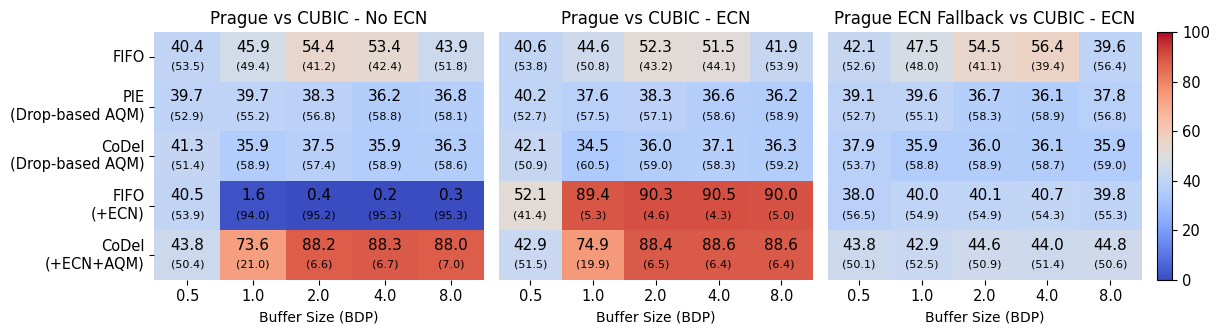

In [ ]:
plots = [{'title': 'Prague vs CUBIC - No ECN', 'CC': 'cubic', 'ECN': 0, 'Fallback': 0},
         {'title': 'Prague vs CUBIC - ECN', 'CC': 'cubic', 'ECN': 1, 'Fallback': 0},
         {'title': 'Prague ECN Fallback vs CUBIC - ECN', 'CC': 'cubic', 'ECN': 1, 'Fallback': 1}]

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12.3,3.44), gridspec_kw={"width_ratios":[1.05, 1, 1, 0.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_tpt[(df_tpt.LegacyCC == p['CC']) &
                    (df_tpt.ECN == p['ECN']) &
                    (df_tpt.Fallback == p['Fallback']) &
                    (df_tpt.Queue.isin(single_queues))]

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "L4S"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(single_queues)
    pivot_table_legacy = pivot_table_legacy.reindex(single_queues)

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s, ax=ax[i], cmap="coolwarm", center=50, vmin=0, vmax=100, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""

            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11)
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='black')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    if i > 0:
        ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
        ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[3])

# Supertitle
#plt.suptitle("Prague throughput (Mbps) vs CUBIC flow",fontsize=15);

plt.tight_layout()

plt.savefig("PRAGUE-tput-cubic-singlequeue-1vs1-v4.pdf")


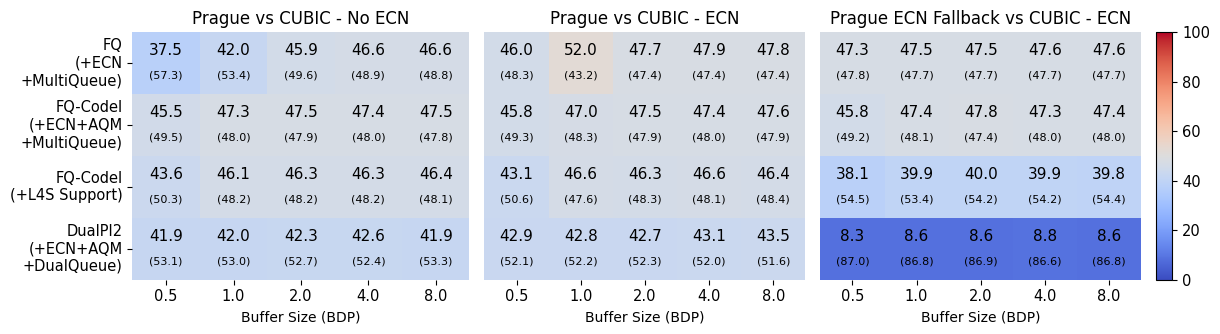

In [ ]:
plots = [{'title': 'Prague vs CUBIC - No ECN', 'CC': 'cubic', 'ECN': 0, 'Fallback': 0},
         {'title': 'Prague vs CUBIC - ECN', 'CC': 'cubic', 'ECN': 1, 'Fallback': 0},
         {'title': 'Prague ECN Fallback vs CUBIC - ECN', 'CC': 'cubic', 'ECN': 1, 'Fallback': 1}]

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12.3,3.44), gridspec_kw={"width_ratios":[1.05, 1, 1, 0.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_tpt[(df_tpt.LegacyCC == p['CC']) &
                    (df_tpt.ECN == p['ECN']) &
                    (df_tpt.Fallback == p['Fallback']) &
                    (df_tpt.Queue.isin(multiple_queues))]

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "L4S"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(multiple_queues)
    pivot_table_legacy = pivot_table_legacy.reindex(multiple_queues)

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s, ax=ax[i], cmap="coolwarm", center=50, vmin=0, vmax=100, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""

            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11)
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='black')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    if i > 0:
        ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
        ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[3])

# Supertitle
#plt.suptitle("Prague throughput (Mbps) vs CUBIC flow",fontsize=15);

plt.tight_layout()

plt.savefig("PRAGUE-tput-cubic-multiplequeue-1vs1-v4.pdf")


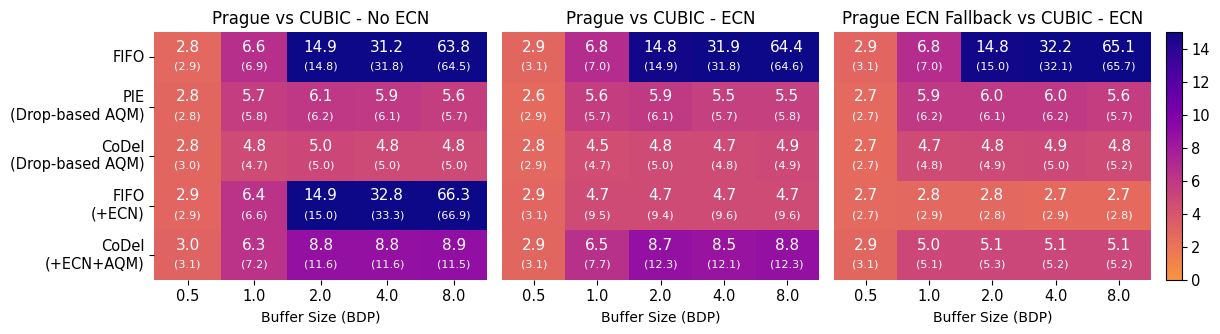

In [ ]:
plots = [{'title': 'Prague vs CUBIC - No ECN', 'CC': 'cubic', 'ECN': 0, 'Fallback': 0},
         {'title': 'Prague vs CUBIC - ECN', 'CC': 'cubic', 'ECN': 1, 'Fallback': 0},
         {'title': 'Prague ECN Fallback vs CUBIC - ECN', 'CC': 'cubic', 'ECN': 1, 'Fallback': 1}]

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12.3,3.44), gridspec_kw={"width_ratios":[1.05, 1, 1, 0.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_rtt[(df_rtt.LegacyCC == p['CC']) &
                    (df_rtt.ECN == p['ECN']) &
                    (df_rtt.Fallback == p['Fallback']) &
                    (df_rtt.Queue.isin(single_queues))]

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "L4S"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(single_queues)
    pivot_table_legacy = pivot_table_legacy.reindex(single_queues)

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s-10, ax=ax[i], cmap="plasma_r", center=5, vmin=0, vmax=15, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            l4s_value = l4s_value -10
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""
            legacy_value = legacy_value-10
            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11, color="white")
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='white')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    if i > 0:
        ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
        ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[3])

# Supertitle
#plt.suptitle("Prague queuing delay (ms) vs CUBIC flow", fontsize=15);

plt.tight_layout()

plt.savefig("PRAGUE-latency-cubic-singlequeue-1vs1-v4.pdf")

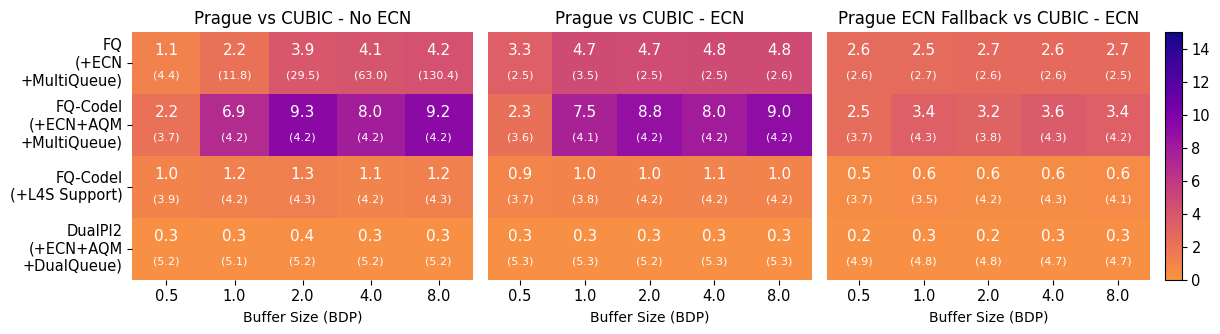

In [ ]:
plots = [{'title': 'Prague vs CUBIC - No ECN', 'CC': 'cubic', 'ECN': 0, 'Fallback': 0},
         {'title': 'Prague vs CUBIC - ECN', 'CC': 'cubic', 'ECN': 1, 'Fallback': 0},
         {'title': 'Prague ECN Fallback vs CUBIC - ECN', 'CC': 'cubic', 'ECN': 1, 'Fallback': 1}]

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12.3,3.44), gridspec_kw={"width_ratios":[1.05, 1, 1, 0.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_rtt[(df_rtt.LegacyCC == p['CC']) &
                    (df_rtt.ECN == p['ECN']) &
                    (df_rtt.Fallback == p['Fallback']) &
                    (df_rtt.Queue.isin(multiple_queues))]

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "L4S"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(multiple_queues)
    pivot_table_legacy = pivot_table_legacy.reindex(multiple_queues)

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s-10, ax=ax[i], cmap="plasma_r", center=5, vmin=0, vmax=15, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            l4s_value = l4s_value -10
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""
            legacy_value = legacy_value-10
            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11, color="white")
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='white')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    if i > 0:
        ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
        ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[3])

# Supertitle
#plt.suptitle("Prague queuing delay (ms) vs CUBIC flow", fontsize=15);

plt.tight_layout()

plt.savefig("PRAGUE-latency-cubic-multiplequeue-1vs1-v4.pdf")

### Prague vs BBRv2

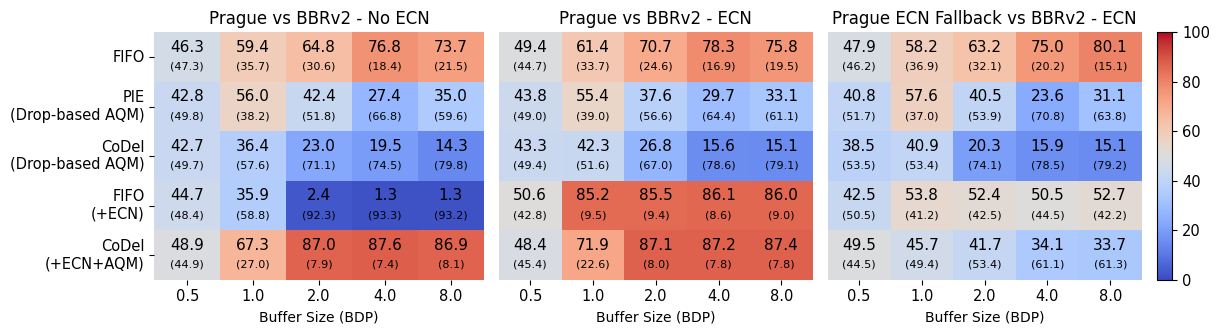

In [ ]:
plots = [{'title': 'Prague vs BBRv2 - No ECN', 'CC': 'bbrv2', 'ECN': 0, 'Fallback': 0},
         {'title': 'Prague vs BBRv2 - ECN', 'CC': 'bbrv2', 'ECN': 1, 'Fallback': 0},
         {'title': 'Prague ECN Fallback vs BBRv2 - ECN', 'CC': 'bbrv2', 'ECN': 1, 'Fallback': 1}]

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12.3,3.44), gridspec_kw={"width_ratios":[1.05, 1, 1, 0.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_tpt[(df_tpt.LegacyCC == p['CC']) &
                    (df_tpt.ECN == p['ECN']) &
                    (df_tpt.Fallback == p['Fallback']) &
                    (df_tpt.Queue.isin(single_queues))]

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "L4S"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(single_queues)
    pivot_table_legacy = pivot_table_legacy.reindex(single_queues)

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s, ax=ax[i], cmap="coolwarm", center=50, vmin=0, vmax=100, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""

            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11)
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='black')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    if i > 0:
        ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
        ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[3])

#plt.suptitle("Prague throughput (Mbps) when sharing 100Mbps bottleneck with BBRv2 flow");
#plt.suptitle("Prague throughput (Mbps) vs BBRv2 flow (classic marking on Receiver)", fontsize=15);
plt.tight_layout()

plt.savefig("PRAGUE-tput-bbrv2-singlequeue-1vs1-v4.pdf")


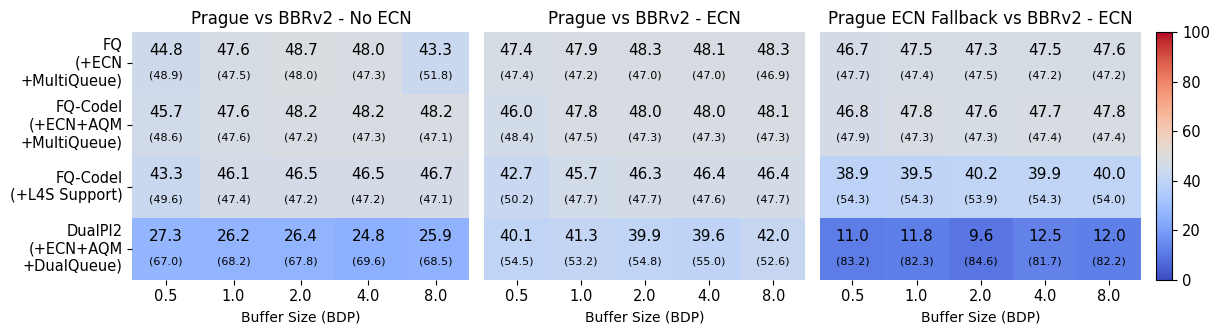

In [ ]:
plots = [{'title': 'Prague vs BBRv2 - No ECN', 'CC': 'bbrv2', 'ECN': 0, 'Fallback': 0},
         {'title': 'Prague vs BBRv2 - ECN', 'CC': 'bbrv2', 'ECN': 1, 'Fallback': 0},
         {'title': 'Prague ECN Fallback vs BBRv2 - ECN', 'CC': 'bbrv2', 'ECN': 1, 'Fallback': 1}]

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12.3,3.44), gridspec_kw={"width_ratios":[1.05, 1, 1, 0.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_tpt[(df_tpt.LegacyCC == p['CC']) &
                    (df_tpt.ECN == p['ECN']) &
                    (df_tpt.Fallback == p['Fallback']) &
                    (df_tpt.Queue.isin(multiple_queues))]

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "L4S"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(multiple_queues)
    pivot_table_legacy = pivot_table_legacy.reindex(multiple_queues)

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s, ax=ax[i], cmap="coolwarm", center=50, vmin=0, vmax=100, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""

            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11)
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='black')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    if i > 0:
        ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
        ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[3])

#plt.suptitle("Prague throughput (Mbps) when sharing 100Mbps bottleneck with BBRv2 flow");
#plt.suptitle("Prague throughput (Mbps) vs BBRv2 flow (classic marking on Receiver)", fontsize=15);
plt.tight_layout()

plt.savefig("PRAGUE-tput-bbrv2-multiplequeue-1vs1-v4.pdf")


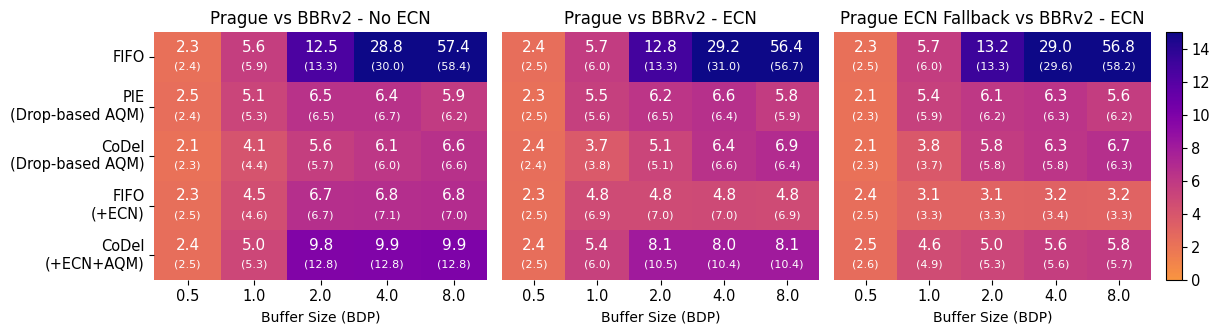

In [ ]:
plots = [{'title': 'Prague vs BBRv2 - No ECN', 'CC': 'bbrv2', 'ECN': 0, 'Fallback': 0},
         {'title': 'Prague vs BBRv2 - ECN', 'CC': 'bbrv2', 'ECN': 1, 'Fallback': 0},
         {'title': 'Prague ECN Fallback vs BBRv2 - ECN', 'CC': 'bbrv2', 'ECN': 1, 'Fallback': 1}]

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12.3,3.44), gridspec_kw={"width_ratios":[1.05, 1, 1, 0.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_rtt[(df_rtt.LegacyCC == p['CC']) &
                    (df_rtt.ECN == p['ECN']) &
                    (df_rtt.Fallback == p['Fallback']) &
                    (df_rtt.Queue.isin(single_queues))]

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "L4S"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(single_queues)
    pivot_table_legacy = pivot_table_legacy.reindex(single_queues)

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s-10, ax=ax[i], cmap="plasma_r", center=5, vmin=0, vmax=15, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            l4s_value = l4s_value -10
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""
            legacy_value = legacy_value-10
            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11, color="white")
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='white')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    if i > 0:
        ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
        ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[3])


#plt.suptitle("Prague queuing delay (ms) vs BBRv2 flow (classic marking on Receiver)", fontsize=15);
plt.tight_layout()

plt.savefig("PRAGUE-latency-bbrv2-singlequeue-1vs1-v4.pdf")

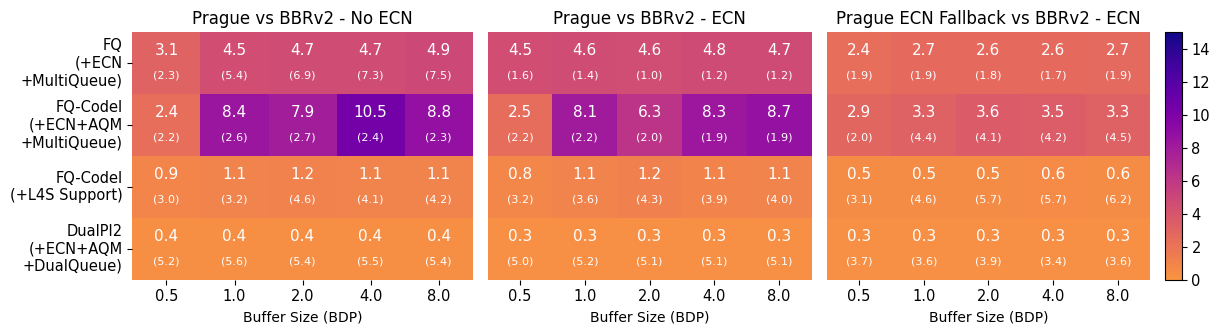

In [ ]:
plots = [{'title': 'Prague vs BBRv2 - No ECN', 'CC': 'bbrv2', 'ECN': 0, 'Fallback': 0},
         {'title': 'Prague vs BBRv2 - ECN', 'CC': 'bbrv2', 'ECN': 1, 'Fallback': 0},
         {'title': 'Prague ECN Fallback vs BBRv2 - ECN', 'CC': 'bbrv2', 'ECN': 1, 'Fallback': 1}]

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12.3,3.44), gridspec_kw={"width_ratios":[1.05, 1, 1, 0.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_rtt[(df_rtt.LegacyCC == p['CC']) &
                    (df_rtt.ECN == p['ECN']) &
                    (df_rtt.Fallback == p['Fallback']) &
                    (df_rtt.Queue.isin(multiple_queues))]

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "L4S"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(multiple_queues)
    pivot_table_legacy = pivot_table_legacy.reindex(multiple_queues)

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s-10, ax=ax[i], cmap="plasma_r", center=5, vmin=0, vmax=15, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            l4s_value = l4s_value -10
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""
            legacy_value = legacy_value-10
            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11, color="white")
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='white')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    if i > 0:
        ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
        ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[3])


#plt.suptitle("Prague queuing delay (ms) vs BBRv2 flow (classic marking on Receiver)", fontsize=15);
plt.tight_layout()

plt.savefig("PRAGUE-latency-bbrv2-multiplequeue-1vs1-v4.pdf")

<ipython-input-20-c3172fc5da16>:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


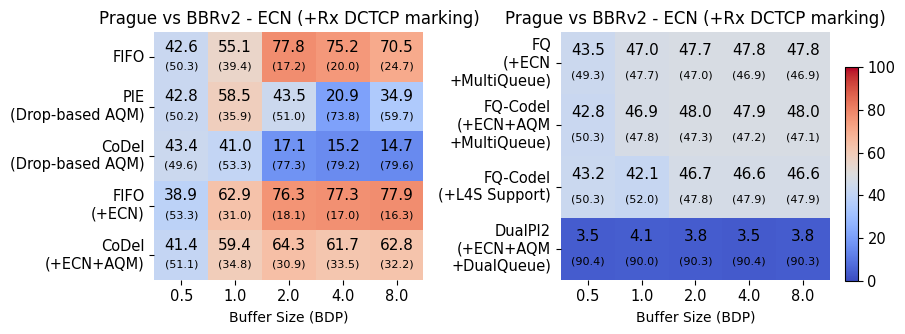

In [ ]:
plots = [{'title': 'Prague vs BBRv2 - ECN (+Rx DCTCP marking)', 'CC': 'bbrv2-dctcp', 'ECN': 1, 'Fallback': 0, 'queues': single_queues},
         {'title': 'Prague vs BBRv2 - ECN (+Rx DCTCP marking)', 'CC': 'bbrv2-dctcp', 'ECN': 1, 'Fallback': 0, 'queues': multiple_queues}]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8.5, 3.44), gridspec_kw={"width_ratios":[1.05, 1.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_tpt[(df_tpt.LegacyCC == p['CC']) &
                    (df_tpt.ECN == p['ECN']) &
                    (df_tpt.Fallback == p['Fallback']) &
                    (df_tpt.Queue.isin(p['queues']))]  # Use the correct queue set

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "L4S"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(p['queues'])
    pivot_table_legacy = pivot_table_legacy.reindex(p['queues'])

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s, ax=ax[i], cmap="coolwarm", center=50, vmin=0, vmax=100, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""

            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11)
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='black')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    #if i > 0:
    #    ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
    #    ax[i].set_yticks([])

# colorbar
cbar_ax = fig.add_axes([1, 0.17, 0.015, 0.62])  # [left, bottom, width, height] of the colorbar
fig.colorbar(ax[0].get_children()[0], cax=cbar_ax)

#fig.colorbar(ax[0].get_children()[0], cax=ax[2])

#plt.suptitle("Prague throughput (Mbps) vs BBRv2 flow (DCTCP Style marking on Receiver)", fontsize=15, x=0.6)
plt.tight_layout()

plt.savefig("PRAGUE-tput-bbrv2-dctcp-singlequeue-vs-multiqueue-1vs1-v2.pdf", bbox_inches='tight')


<ipython-input-21-b9412a7a9bd8>:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


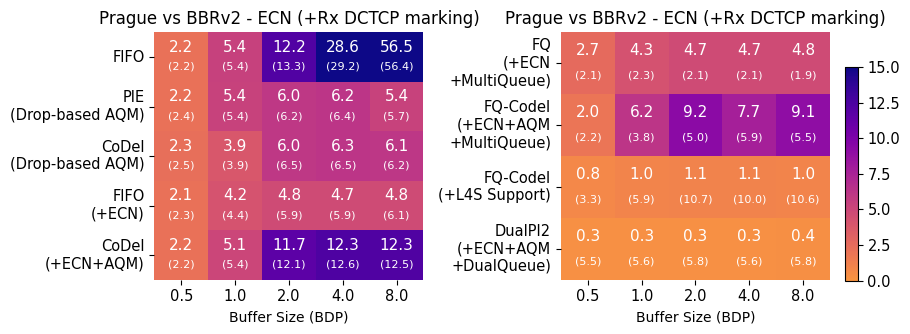

In [ ]:
plots = [{'title': 'Prague vs BBRv2 - ECN (+Rx DCTCP marking)', 'CC': 'bbrv2-dctcp', 'ECN': 1, 'Fallback': 0, 'queues': single_queues},
         {'title': 'Prague vs BBRv2 - ECN (+Rx DCTCP marking)', 'CC': 'bbrv2-dctcp', 'ECN': 1, 'Fallback': 0, 'queues': multiple_queues}]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8.5, 3.44), gridspec_kw={"width_ratios":[1.05, 1.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_rtt[(df_rtt.LegacyCC == p['CC']) &
                    (df_rtt.ECN == p['ECN']) &
                    (df_rtt.Fallback == p['Fallback']) &
                    (df_rtt.Queue.isin(p['queues']))]  # Use the correct queue set

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "L4S"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(p['queues'])
    pivot_table_legacy = pivot_table_legacy.reindex(p['queues'])

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s-10, ax=ax[i], cmap="plasma_r", center=5, vmin=0, vmax=15, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            l4s_value = l4s_value -10
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""
            legacy_value = legacy_value - 10

            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11, color='white')
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='white')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    #if i > 0:
    #    ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
    #    ax[i].set_yticks([])

# colorbar
cbar_ax = fig.add_axes([1, 0.17, 0.015, 0.62])  # [left, bottom, width, height] of the colorbar
fig.colorbar(ax[0].get_children()[0], cax=cbar_ax)

#fig.colorbar(ax[0].get_children()[0], cax=ax[2])

#plt.suptitle("Prague queuing delay (ms) vs BBRv2 flow (DCTCP Style marking on Receiver)", fontsize=15, x=0.6)
plt.tight_layout()

plt.savefig("PRAGUE-latency-bbrv2-dctcp-singlequeue-vs-multiqueue-1vs1-v2.pdf", bbox_inches='tight')

### Prague vs BBRv1

<ipython-input-22-b6c746f5260b>:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


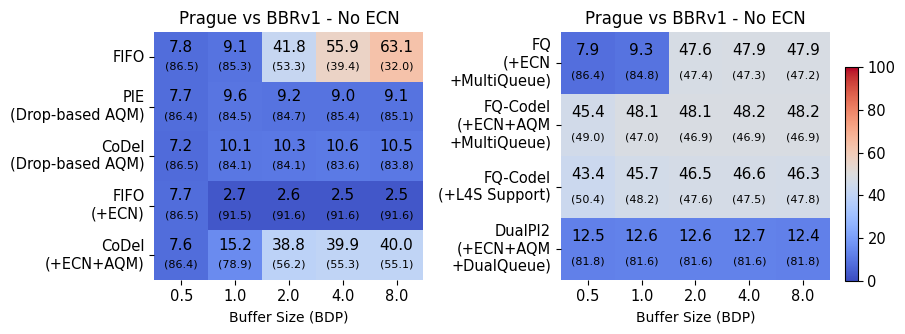

In [ ]:
plots = [{'title': 'Prague vs BBRv1 - No ECN', 'CC': 'bbrv1', 'ECN': 0, 'Fallback': 0, 'queues': single_queues},
         {'title': 'Prague vs BBRv1 - No ECN', 'CC': 'bbrv1', 'ECN': 0, 'Fallback': 0, 'queues': multiple_queues}]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8.5, 3.44), gridspec_kw={"width_ratios":[1.05, 1.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_tpt[(df_tpt.LegacyCC == p['CC']) &
                    (df_tpt.ECN == p['ECN']) &
                    (df_tpt.Fallback == p['Fallback']) &
                    (df_tpt.Queue.isin(p['queues']))]  # Use the correct queue set

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "L4S"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(p['queues'])
    pivot_table_legacy = pivot_table_legacy.reindex(p['queues'])

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s, ax=ax[i], cmap="coolwarm", center=50, vmin=0, vmax=100, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""

            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11)
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='black')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    #if i > 0:
    #    ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
    #    ax[i].set_yticks([])

# colorbar
cbar_ax = fig.add_axes([1, 0.17, 0.015, 0.62])  # [left, bottom, width, height] of the colorbar
fig.colorbar(ax[0].get_children()[0], cax=cbar_ax)

#fig.colorbar(ax[0].get_children()[0], cax=ax[2])

#plt.suptitle("Prague throughput (Mbps) vs BBRv1 flow", fontsize=15)
plt.tight_layout()

plt.savefig("PRAGUE-tput-bbrv1-singlequeue-vs-multiqueue-1vs1-v2.pdf", bbox_inches='tight')


<ipython-input-23-09b48ffe81d3>:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


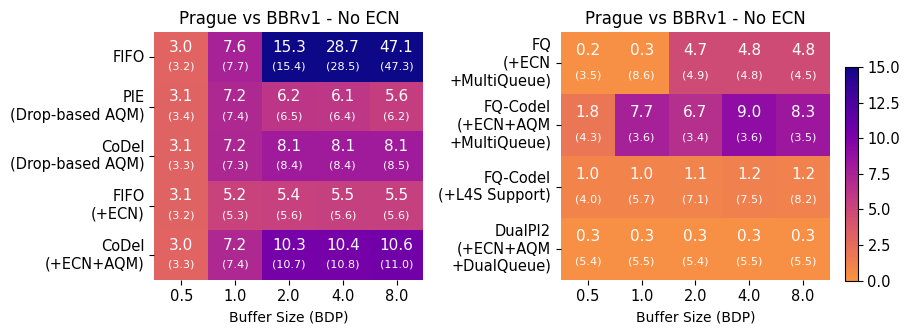

In [ ]:
plots = [{'title': 'Prague vs BBRv1 - No ECN', 'CC': 'bbrv1', 'ECN': 0, 'Fallback': 0, 'queues': single_queues},
         {'title': 'Prague vs BBRv1 - No ECN', 'CC': 'bbrv1', 'ECN': 0, 'Fallback': 0, 'queues': multiple_queues}]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8.5, 3.44), gridspec_kw={"width_ratios":[1.05, 1.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_rtt[(df_rtt.LegacyCC == p['CC']) &
                    (df_rtt.ECN == p['ECN']) &
                    (df_rtt.Fallback == p['Fallback']) &
                    (df_rtt.Queue.isin(p['queues']))]  # Use the correct queue set

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "L4S"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(p['queues'])
    pivot_table_legacy = pivot_table_legacy.reindex(p['queues'])

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s-10, ax=ax[i], cmap="plasma_r", center=5, vmin=0, vmax=15, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            l4s_value = l4s_value -10
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""
            legacy_value = legacy_value - 10

            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11, color='white')
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='white')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    #if i > 0:
    #    ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
    #    ax[i].set_yticks([])

# colorbar
cbar_ax = fig.add_axes([1, 0.17, 0.015, 0.62])  # [left, bottom, width, height] of the colorbar
fig.colorbar(ax[0].get_children()[0], cax=cbar_ax)

#fig.colorbar(ax[0].get_children()[0], cax=ax[2])

#plt.suptitle("Prague queuing delay (ms) vs BBRv1 flow", fontsize=15)
plt.tight_layout()

plt.savefig("PRAGUE-latency-bbrv1-singlequeue-vs-multiqueue-1vs1-v2.pdf", bbox_inches='tight')


### Prague vs BBRv3

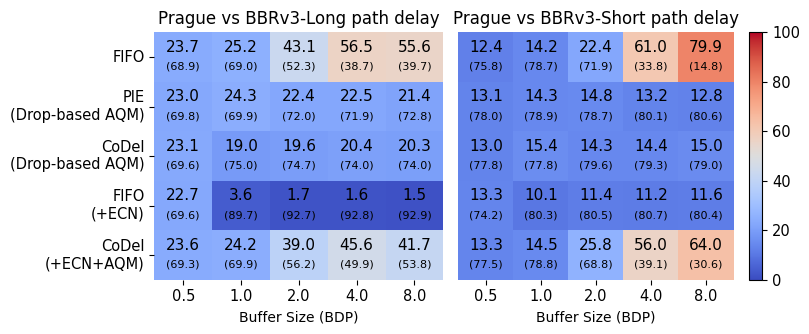

In [ ]:
plots = [{'title': 'Prague vs BBRv3-Long path delay', 'CC': 'bbrv3', 'ECN': 1, 'Fallback': 0, 'BaseRTT': 10},
         {'title': 'Prague vs BBRv3-Short path delay', 'CC': 'ecnlow-bbrv3', 'ECN': 1, 'Fallback': 0, 'BaseRTT': 2}]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8.2,3.44), gridspec_kw={"width_ratios":[1.05, 1, 0.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_tpt[(df_tpt.LegacyCC == p['CC']) &
                    (df_tpt.ECN == p['ECN']) &
                    (df_tpt.Fallback == p['Fallback']) &
                    (df_tpt.BaseRTT == p['BaseRTT']) &
                    (df_tpt.Queue.isin(single_queues))]

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "L4S"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(single_queues)
    pivot_table_legacy = pivot_table_legacy.reindex(single_queues)

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s, ax=ax[i], cmap="coolwarm", center=50, vmin=0, vmax=100, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""

            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11)
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='black')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    if i > 0:
        ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
        ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[2])

# Supertitle
#plt.suptitle("Prague throughput (Mbps) vs BBRv3 flow - classic marking on Receiver",fontsize=15);

plt.tight_layout()

plt.savefig("PRAGUE-tput-bbrv3-singlequeue-1vs1-v4.pdf")


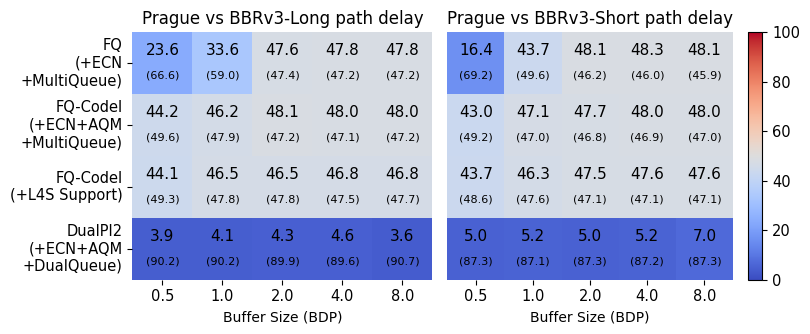

In [ ]:
plots = [{'title': 'Prague vs BBRv3-Long path delay', 'CC': 'bbrv3', 'ECN': 1, 'Fallback': 0, 'BaseRTT': 10},
         {'title': 'Prague vs BBRv3-Short path delay', 'CC': 'ecnlow-bbrv3', 'ECN': 1, 'Fallback': 0, 'BaseRTT': 2}]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8.2,3.44), gridspec_kw={"width_ratios":[1.05, 1, 0.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_tpt[(df_tpt.LegacyCC == p['CC']) &
                    (df_tpt.ECN == p['ECN']) &
                    (df_tpt.Fallback == p['Fallback']) &
                    (df_tpt.BaseRTT == p['BaseRTT']) &
                    (df_tpt.Queue.isin(multiple_queues))]

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "L4S"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(multiple_queues)
    pivot_table_legacy = pivot_table_legacy.reindex(multiple_queues)

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s, ax=ax[i], cmap="coolwarm", center=50, vmin=0, vmax=100, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""

            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11)
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='black')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    if i > 0:
        ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
        ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[2])

# Supertitle
#plt.suptitle("Prague throughput (Mbps) vs BBRv3 flow - classic marking on Receiver",fontsize=15);

plt.tight_layout()

plt.savefig("PRAGUE-tput-bbrv3-multiplequeue-1vs1-v4.pdf")


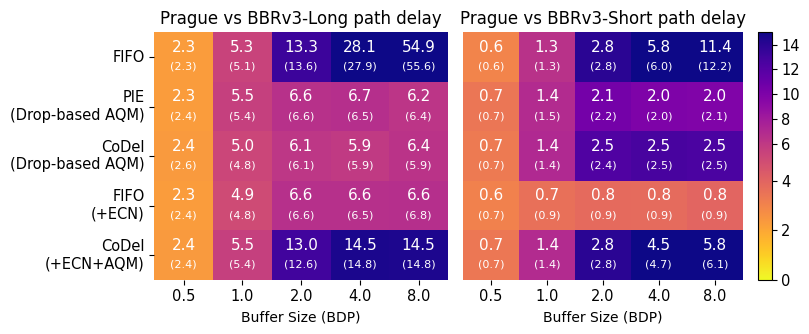

In [ ]:
from matplotlib import colors

plots = [{'title': 'Prague vs BBRv3-Long path delay', 'CC': 'bbrv3', 'ECN': 1, 'Fallback': 0, 'BaseRTT': 10, 'ECNThresh': 5},
         {'title': 'Prague vs BBRv3-Short path delay', 'CC': 'ecnlow-bbrv3', 'ECN': 1, 'Fallback': 0, 'BaseRTT': 2, 'ECNThresh':1}]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8.2,3.44), gridspec_kw={"width_ratios":[1.05, 1, 0.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_rtt[(df_rtt.LegacyCC == p['CC']) &
                    (df_rtt.ECN == p['ECN']) &
                    (df_rtt.Fallback == p['Fallback']) &
                    (df_tpt.BaseRTT == p['BaseRTT']) &
                    (df_rtt.Queue.isin(single_queues))]

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "L4S"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(single_queues)
    pivot_table_legacy = pivot_table_legacy.reindex(single_queues)



    divnorm = colors.TwoSlopeNorm(vmin=0, vcenter=p['ECNThresh'], vmax=p['ECNThresh'] + p['BaseRTT'])

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s-p['BaseRTT'], ax=ax[i], cmap="plasma_r", norm=divnorm, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            l4s_value = l4s_value -p['BaseRTT']
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""
            legacy_value = legacy_value-p['BaseRTT']
            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11, color="white")
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='white')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    if i > 0:
        ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
        ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[2])

# Supertitle
#plt.suptitle("Prague queuing delay (ms) vs BBRv3 flow - classic marking on Receiver", fontsize=15);

plt.tight_layout()

plt.savefig("PRAGUE-latency-bbrv3-singlequeue-1vs1-v4.pdf")

5
15
1
3


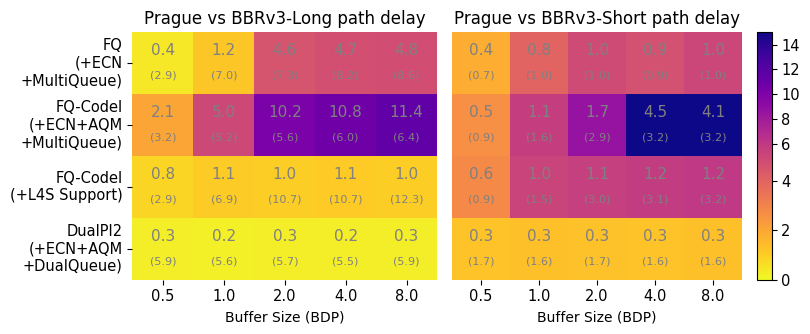

In [ ]:
from matplotlib import colors

plots = [{'title': 'Prague vs BBRv3-Long path delay', 'CC': 'bbrv3', 'ECN': 1, 'Fallback': 0, 'BaseRTT': 10, 'ECNThresh': 5},
         {'title': 'Prague vs BBRv3-Short path delay', 'CC': 'ecnlow-bbrv3', 'ECN': 1, 'Fallback': 0, 'BaseRTT': 2, 'ECNThresh':1}]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8.2,3.44), gridspec_kw={"width_ratios":[1.05, 1, 0.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_rtt[(df_rtt.LegacyCC == p['CC']) &
                    (df_rtt.ECN == p['ECN']) &
                    (df_rtt.Fallback == p['Fallback']) &
                    (df_tpt.BaseRTT == p['BaseRTT']) &
                    (df_rtt.Queue.isin(multiple_queues))]

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "L4S"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(multiple_queues)
    pivot_table_legacy = pivot_table_legacy.reindex(multiple_queues)



    divnorm = colors.TwoSlopeNorm(vmin=0, vcenter=p['ECNThresh'], vmax=p['ECNThresh'] + p['BaseRTT'])
    print(p['ECNThresh'])
    print(p['ECNThresh'] + p['BaseRTT'])
    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s-p['BaseRTT'], ax=ax[i], cmap="plasma_r", norm=divnorm, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            l4s_value = l4s_value -p['BaseRTT']
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""
            legacy_value = legacy_value-p['BaseRTT']
            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11, color="gray")
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='gray')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    if i > 0:
        ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
        ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[2])

# Supertitle
#plt.suptitle("Prague queuing delay (ms) vs BBRv3 flow - classic marking on Receiver", fontsize=15);

plt.tight_layout()

plt.savefig("PRAGUE-latency-bbrv3-multiplequeue-1vs1-v4.pdf")

## Extra checks

Just as an extra check, I want to see how much variance is in the result - these are potential red flags for data reliability.

I also want to check on legacy flow throughput and RTT for the same scenarios.


Check on legacy flows -

In [ ]:
exp_factors = ['LegacyCC', 'ECN', 'ECNThresh', 'Fallback', 'FlowType', 'BufferSize', 'BottleneckCap', 'BaseRTT', 'Queue', 'AccECN']
df_rtt = df[df.ValueType=="RTT"].pivot_table(index=exp_factors, values=['Value'], aggfunc='mean').reset_index()
df_tpt = df[df.ValueType=="Throughput"].pivot_table(index=exp_factors, values=['Value'], aggfunc='mean').reset_index()

<ipython-input-28-515fb4f00794>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_rtt = df[df.ValueType=="RTT"].pivot_table(index=exp_factors, values=['Value'], aggfunc='mean').reset_index()
<ipython-input-28-515fb4f00794>:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_tpt = df[df.ValueType=="Throughput"].pivot_table(index=exp_factors, values=['Value'], aggfunc='mean').reset_index()


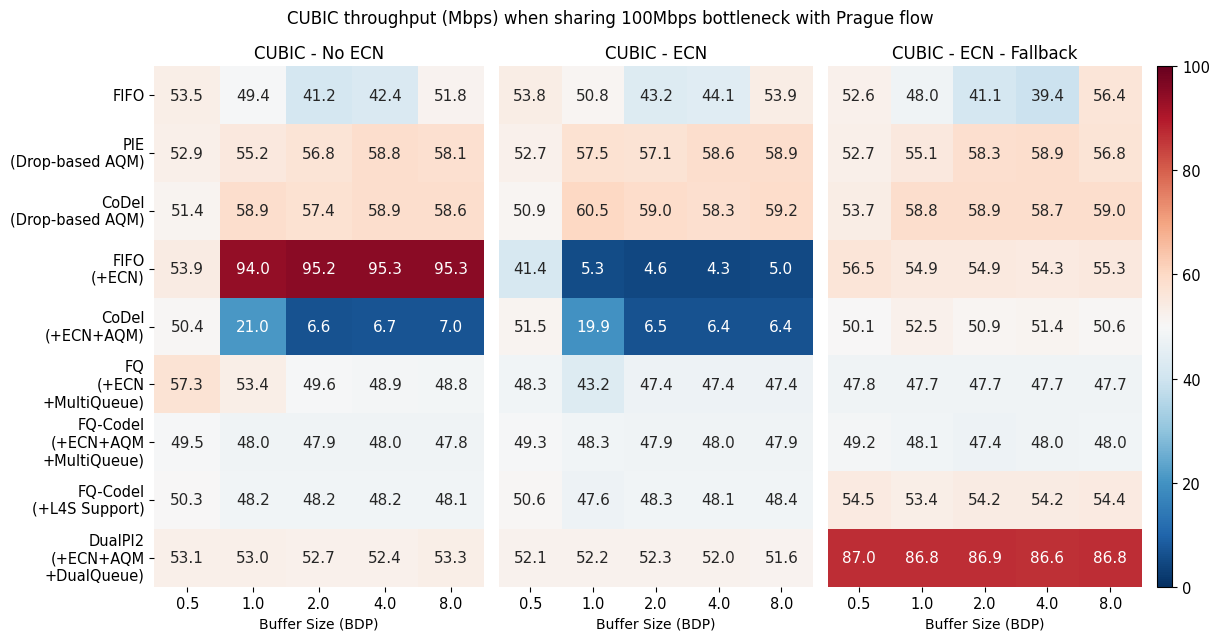

In [ ]:
plots = [{'title': 'CUBIC - No ECN', 'CC': 'cubic', 'ECN': 0, 'Fallback': 0},
         {'title': 'CUBIC - ECN', 'CC': 'cubic', 'ECN': 1, 'Fallback': 0},
         {'title': 'CUBIC - ECN - Fallback', 'CC': 'cubic', 'ECN': 1, 'Fallback': 1}]

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12.3,6.5),  gridspec_kw={"width_ratios":[1.05, 1, 1, 0.05]})

for i, p in enumerate(plots):
  dat_hm = df_tpt[(df_tpt.LegacyCC==p['CC']) & (df_tpt.FlowType=="Legacy") & (df_tpt.ECN==p['ECN']) & (df_tpt.Fallback==p['Fallback'])].pivot(index=["Queue"], columns=["BufferSize"], values="Value")
  sns.heatmap(dat_hm, ax=ax[i], annot=True, fmt=".1f", cmap="RdBu_r", center=50, vmin=0, vmax=100, cbar=False, annot_kws={"fontsize":11})
  ax[i].set_title(p['title'])
  ax[i].set_xlabel("Buffer Size (BDP)")
  ax[i].set_ylabel("")

  if i > 0:
    ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
    ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[3])

plt.suptitle("CUBIC throughput (Mbps) when sharing 100Mbps bottleneck with Prague flow");
plt.tight_layout()


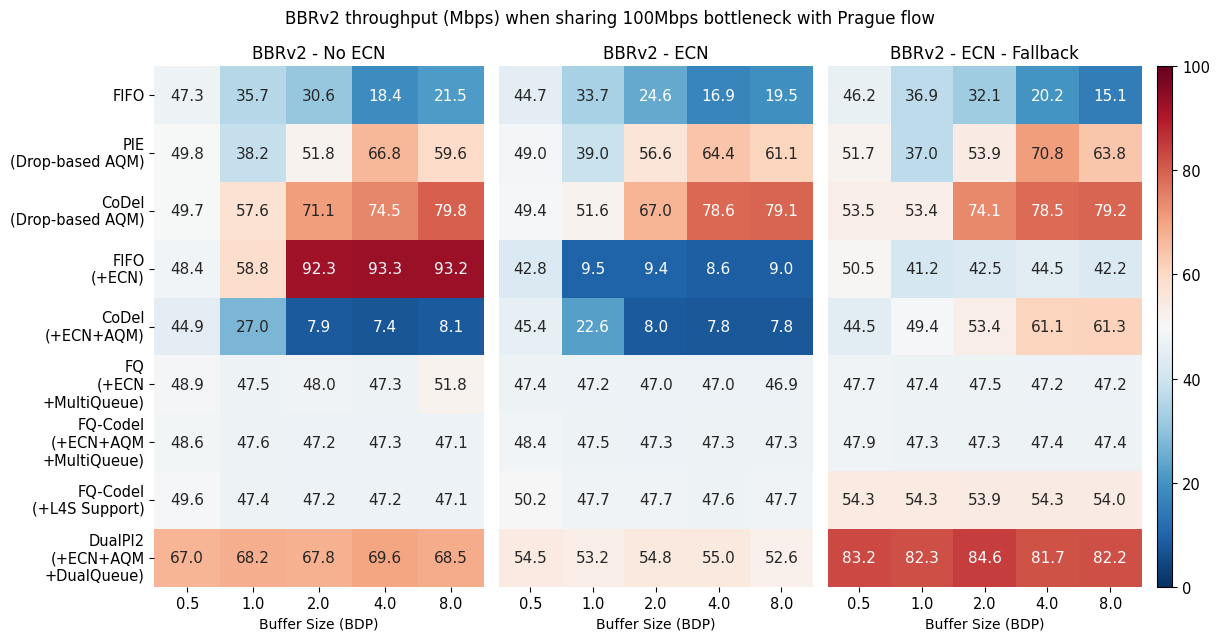

In [ ]:
plots = [{'title': 'BBRv2 - No ECN', 'CC': 'bbrv2', 'ECN': 0, 'Fallback': 0},
         {'title': 'BBRv2 - ECN', 'CC': 'bbrv2', 'ECN': 1, 'Fallback': 0},
         {'title': 'BBRv2 - ECN - Fallback', 'CC': 'bbrv2', 'ECN': 1, 'Fallback': 1}]

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12.3,6.5),  gridspec_kw={"width_ratios":[1.05, 1, 1, 0.05]})

for i, p in enumerate(plots):
  dat_hm = df_tpt[(df_tpt.LegacyCC==p['CC']) & (df_tpt.FlowType=="Legacy") & (df_tpt.ECN==p['ECN']) & (df_tpt.Fallback==p['Fallback'])].pivot(index=["Queue"], columns=["BufferSize"], values="Value")
  sns.heatmap(dat_hm, ax=ax[i], annot=True, fmt=".1f", cmap="RdBu_r", center=50, vmin=0, vmax=100, cbar=False, annot_kws={"fontsize":11})
  ax[i].set_title(p['title'])
  ax[i].set_xlabel("Buffer Size (BDP)")
  ax[i].set_ylabel("")

  if i > 0:
    ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
    ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[3])

plt.suptitle("BBRv2 throughput (Mbps) when sharing 100Mbps bottleneck with Prague flow");
plt.tight_layout()


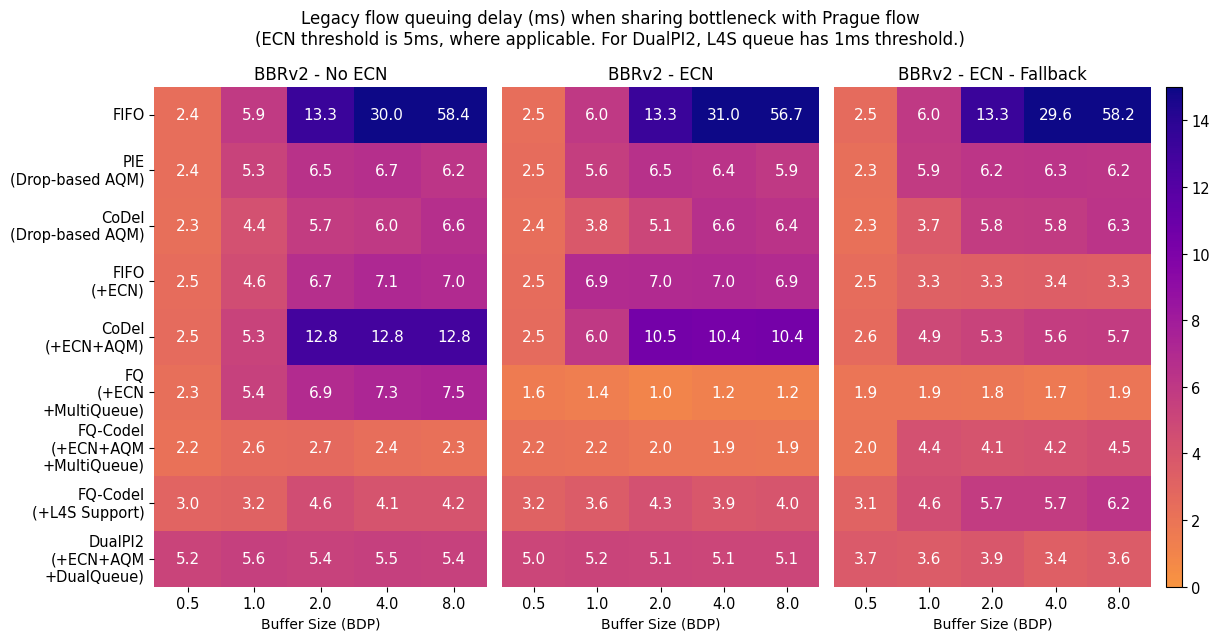

In [ ]:
plots = [{'title': 'BBRv2 - No ECN', 'CC': 'bbrv2', 'ECN': 0, 'Fallback': 0},
         {'title': 'BBRv2 - ECN', 'CC': 'bbrv2', 'ECN': 1, 'Fallback': 0},
         {'title': 'BBRv2 - ECN - Fallback', 'CC': 'bbrv2', 'ECN': 1, 'Fallback': 1}]

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12.3,6.5),  gridspec_kw={"width_ratios":[1.05, 1, 1, 0.05]})

for i, p in enumerate(plots):
  dat_hm = df_rtt[(df_rtt.LegacyCC==p['CC']) & (df_rtt.FlowType=="Legacy") & (df_rtt.ECN==p['ECN']) & (df_rtt.Fallback==p['Fallback'])].pivot(index=["Queue"], columns=["BufferSize"], values="Value")
  sns.heatmap(dat_hm-10, ax=ax[i], annot=True, fmt=".1f", cmap="plasma_r", center=5, vmin=0, vmax=15, cbar=False, annot_kws={"fontsize":11})
  ax[i].set_title(p['title'])
  ax[i].set_xlabel("Buffer Size (BDP)")
  ax[i].set_ylabel("")

  if i > 0:
    ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
    ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[3])

plt.suptitle("Legacy flow queuing delay (ms) when sharing bottleneck with Prague flow\n(ECN threshold is 5ms, where applicable. For DualPI2, L4S queue has 1ms threshold.)");
plt.tight_layout()
plt.savefig("bbrv2_legacy_latency.pdf")


## Check on standard deviation -

In [ ]:
# now make data frames with mean value for each metric
exp_factors = ['LegacyCC', 'ECN', 'ECNThresh', 'Fallback', 'FlowType', 'BufferSize', 'BottleneckCap', 'BaseRTT', 'Queue', 'AccECN']
df_rtt = df[df.ValueType=="RTT"].pivot_table(index=exp_factors, values=['Value'], aggfunc='std').reset_index()
df_tpt = df[df.ValueType=="Throughput"].pivot_table(index=exp_factors, values=['Value'], aggfunc='std').reset_index()

<ipython-input-35-5f12b86fc3b4>:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_rtt = df[df.ValueType=="RTT"].pivot_table(index=exp_factors, values=['Value'], aggfunc='std').reset_index()
<ipython-input-35-5f12b86fc3b4>:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_tpt = df[df.ValueType=="Throughput"].pivot_table(index=exp_factors, values=['Value'], aggfunc='std').reset_index()


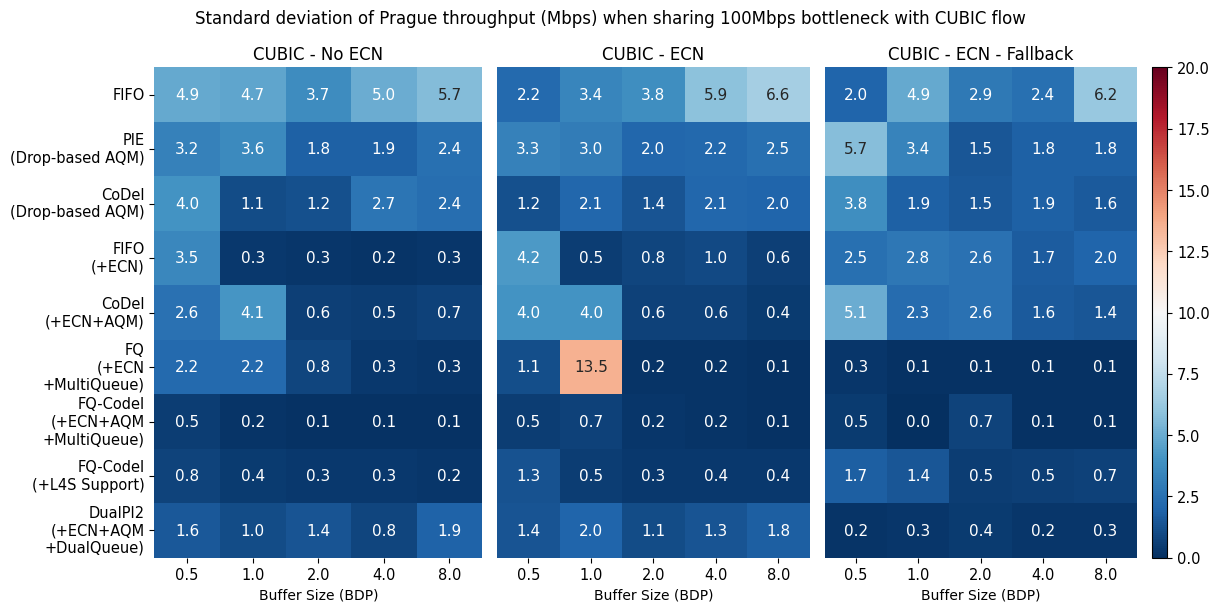

In [ ]:
plots = [{'title': 'CUBIC - No ECN', 'CC': 'cubic', 'ECN': 0, 'Fallback': 0},
         {'title': 'CUBIC - ECN', 'CC': 'cubic', 'ECN': 1, 'Fallback': 0},
         {'title': 'CUBIC - ECN - Fallback', 'CC': 'cubic', 'ECN': 1, 'Fallback': 1}]

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12.3,6.2),  gridspec_kw={"width_ratios":[1.05, 1, 1, 0.05]})

for i, p in enumerate(plots):
  dat_hm = df_tpt[(df_tpt.LegacyCC==p['CC']) & (df_tpt.FlowType=="L4S") & (df_tpt.ECN==p['ECN']) & (df_tpt.Fallback==p['Fallback'])].pivot(index=["Queue"], columns=["BufferSize"], values="Value")
  sns.heatmap(dat_hm, ax=ax[i], annot=True, fmt=".1f", cmap="RdBu_r", center=10, vmin=0, vmax=20, cbar=False, annot_kws={"fontsize":11})
  ax[i].set_title(p['title'])
  ax[i].set_xlabel("Buffer Size (BDP)")
  ax[i].set_ylabel("")

  if i > 0:
    ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
    ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[3])

plt.suptitle("Standard deviation of Prague throughput (Mbps) when sharing 100Mbps bottleneck with CUBIC flow");
plt.tight_layout()

In [ ]:
df[(df.LegacyCC=="cubic") & (df.ECN==0) & (df.Fallback==0) & (df.BufferSize==2) & (df.Queue=='CoDel\n(+ECN+AQM)') & (df.ValueType=='Throughput')]

LegacyCC ECN ECNThresh Fallback FlowType  BufferSize  BottleneckCap  \
0    cubic   0         5        0      L4S         2.0          100.0   
0    cubic   0         5        0      L4S         2.0          100.0   
0    cubic   0         5        0      L4S         2.0          100.0   
0    cubic   0         5        0      L4S         2.0          100.0   
0    cubic   0         5        0      L4S         2.0          100.0   
0    cubic   0         5        0      L4S         2.0          100.0   
0    cubic   0         5        0      L4S         2.0          100.0   
0    cubic   0         5        0      L4S         2.0          100.0   
0    cubic   0         5        0      L4S         2.0          100.0   
0    cubic   0         5        0      L4S         2.0          100.0   
0    cubic   0         5        0   Legacy         2.0          100.0   
0    cubic   0         5        0   Legacy         2.0          100.0   
0    cubic   0         5        0   Legacy         2.0          100.0   
0    cubic   0         5        0   Legacy         2.0          100.0   
0    cubic   0         5        0   Legacy         2.0          100.0   
0    cubic   0         5        0   Legacy         2.0          100.0   
0    cubic   0         5        0   Legacy         2.0          100.0   
0    cubic   0         5        0   Legacy         2.0          100.0   
0    cubic   0         5        0   Legacy         2.0          100.0   
0    cubic   0         5        0   Legacy         2.0          100.0   

   BaseRTT              Queue AccECN Trial      Value   ValueType  \
0     10.0  CoDel\n(+ECN+AQM)      3     9  88.936875  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     7  88.233759  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     5  88.017665  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     6  87.244883  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     1  88.597153  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     4  87.703519  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     8  88.513711  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     2  87.839766  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3    10  89.218968  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     3  87.948865  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     1   6.084766  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3    10   5.602985  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     8   6.757553  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     6   7.447764  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     7   6.515341  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     4   7.091919  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     5   6.821926  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     9   5.798160  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     2   6.829171  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     3   6.801062  Throughput   

                                  str  
0   prague_2.0_100_10_Codel_5_0_3_0_9  
0   prague_2.0_100_10_Codel_5_0_3_0_7  
0   prague_2.0_100_10_Codel_5_0_3_0_5  
0   prague_2.0_100_10_Codel_5_0_3_0_6  
0   prague_2.0_100_10_Codel_5_0_3_0_1  
0   prague_2.0_100_10_Codel_5_0_3_0_4  
0   prague_2.0_100_10_Codel_5_0_3_0_8  
0   prague_2.0_100_10_Codel_5_0_3_0_2  
0  prague_2.0_100_10_Codel_5_0_3_0_10  
0   prague_2.0_100_10_Codel_5_0_3_0_3  
0    cubic_2.0_100_10_Codel_5_0_3_0_1  
0   cubic_2.0_100_10_Codel_5_0_3_0_10  
0    cubic_2.0_100_10_Codel_5_0_3_0_8  
0    cubic_2.0_100_10_Codel_5_0_3_0_6  
0    cubic_2.0_100_10_Codel_5_0_3_0_7  
0    cubic_2.0_100_10_Codel_5_0_3_0_4  
0    cubic_2.0_100_10_Codel_5_0_3_0_5  
0    cubic_2.0_100_10_Codel_5_0_3_0_9  
0    cubic_2.0_100_10_Codel_5_0_3_0_2  
0    cubic_2.0_100_10_Codel_5_0_3_0_3

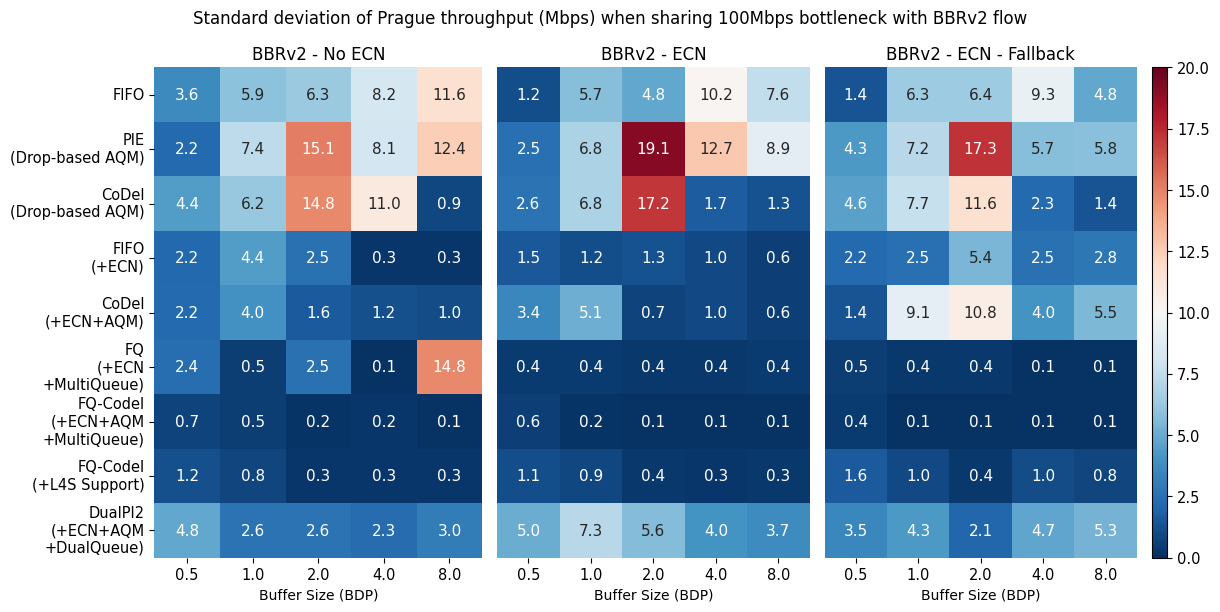

In [ ]:
plots = [{'title': 'BBRv2 - No ECN', 'CC': 'bbrv2', 'ECN': 0, 'Fallback': 0},
         {'title': 'BBRv2 - ECN', 'CC': 'bbrv2', 'ECN': 1, 'Fallback': 0},
         {'title': 'BBRv2 - ECN - Fallback', 'CC': 'bbrv2', 'ECN': 1, 'Fallback': 1}]

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12.3,6.2),  gridspec_kw={"width_ratios":[1.05, 1, 1, 0.05]})

for i, p in enumerate(plots):
  dat_hm = df_tpt[(df_tpt.LegacyCC==p['CC']) & (df_tpt.FlowType=="L4S") & (df_tpt.ECN==p['ECN']) & (df_tpt.Fallback==p['Fallback'])].pivot(index=["Queue"], columns=["BufferSize"], values="Value")
  sns.heatmap(dat_hm, ax=ax[i], annot=True, fmt=".1f", cmap="RdBu_r", center=10, vmin=0, vmax=20, cbar=False, annot_kws={"fontsize":11})
  ax[i].set_title(p['title'])
  ax[i].set_xlabel("Buffer Size (BDP)")
  ax[i].set_ylabel("")

  if i > 0:
    ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
    ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[3])

plt.suptitle("Standard deviation of Prague throughput (Mbps) when sharing 100Mbps bottleneck with BBRv2 flow");
plt.tight_layout()


In [ ]:
df[(df.LegacyCC=="bbrv2") & (df.ECN==0) & (df.Fallback==0) & (df.BufferSize==1) & (df.Queue=='CoDel\n(+ECN+AQM)') & (df.ValueType=='Throughput')]

LegacyCC ECN ECNThresh Fallback FlowType  BufferSize  BottleneckCap  \
0    bbrv2   0         5        0   Legacy         1.0          100.0   
0    bbrv2   0         5        0   Legacy         1.0          100.0   
0    bbrv2   0         5        0   Legacy         1.0          100.0   
0    bbrv2   0         5        0   Legacy         1.0          100.0   
0    bbrv2   0         5        0   Legacy         1.0          100.0   
0    bbrv2   0         5        0   Legacy         1.0          100.0   
0    bbrv2   0         5        0   Legacy         1.0          100.0   
0    bbrv2   0         5        0   Legacy         1.0          100.0   
0    bbrv2   0         5        0   Legacy         1.0          100.0   
0    bbrv2   0         5        0   Legacy         1.0          100.0   
0    bbrv2   0         5        0      L4S         1.0          100.0   
0    bbrv2   0         5        0      L4S         1.0          100.0   
0    bbrv2   0         5        0      L4S         1.0          100.0   
0    bbrv2   0         5        0      L4S         1.0          100.0   
0    bbrv2   0         5        0      L4S         1.0          100.0   
0    bbrv2   0         5        0      L4S         1.0          100.0   
0    bbrv2   0         5        0      L4S         1.0          100.0   
0    bbrv2   0         5        0      L4S         1.0          100.0   
0    bbrv2   0         5        0      L4S         1.0          100.0   
0    bbrv2   0         5        0      L4S         1.0          100.0   

   BaseRTT              Queue AccECN Trial      Value   ValueType  \
0     10.0  CoDel\n(+ECN+AQM)      3     2  30.250152  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     4  24.328378  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     3  27.284403  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     5  23.959683  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     9  20.708675  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3    10  33.246368  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     1  27.489945  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     8  23.714054  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     7  29.973352  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     6  29.008513  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     9  73.771553  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3    10  61.626996  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     2  63.885228  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     7  63.530114  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     6  64.849516  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     1  66.639710  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     5  71.221137  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     3  66.320240  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     4  70.083052  Throughput   
0     10.0  CoDel\n(+ECN+AQM)      3     8  70.752179  Throughput   

                                  str  
0     bbr2_1.0_100_10_Codel_5_0_3_0_2  
0     bbr2_1.0_100_10_Codel_5_0_3_0_4  
0     bbr2_1.0_100_10_Codel_5_0_3_0_3  
0     bbr2_1.0_100_10_Codel_5_0_3_0_5  
0     bbr2_1.0_100_10_Codel_5_0_3_0_9  
0    bbr2_1.0_100_10_Codel_5_0_3_0_10  
0     bbr2_1.0_100_10_Codel_5_0_3_0_1  
0     bbr2_1.0_100_10_Codel_5_0_3_0_8  
0     bbr2_1.0_100_10_Codel_5_0_3_0_7  
0     bbr2_1.0_100_10_Codel_5_0_3_0_6  
0   prague_1.0_100_10_Codel_5_0_3_0_9  
0  prague_1.0_100_10_Codel_5_0_3_0_10  
0   prague_1.0_100_10_Codel_5_0_3_0_2  
0   prague_1.0_100_10_Codel_5_0_3_0_7  
0   prague_1.0_100_10_Codel_5_0_3_0_6  
0   prague_1.0_100_10_Codel_5_0_3_0_1  
0   prague_1.0_100_10_Codel_5_0_3_0_5  
0   prague_1.0_100_10_Codel_5_0_3_0_3  
0   prague_1.0_100_10_Codel_5_0_3_0_4  
0   prague_1.0_100_10_Codel_5_0_3_0_8

In [ ]:
df[(df.LegacyCC=="bbrv2") & (df.ECN==0) & (df.Fallback==0) & (df.BufferSize==8) & (df.Queue=='FQ\n(+ECN\n+MultiQueue)') & (df.ValueType=='Throughput')]

LegacyCC ECN ECNThresh Fallback FlowType  BufferSize  BottleneckCap  \
0    bbrv2   0         5        0   Legacy         8.0          100.0   
0    bbrv2   0         5        0   Legacy         8.0          100.0   
0    bbrv2   0         5        0   Legacy         8.0          100.0   
0    bbrv2   0         5        0   Legacy         8.0          100.0   
0    bbrv2   0         5        0   Legacy         8.0          100.0   
0    bbrv2   0         5        0   Legacy         8.0          100.0   
0    bbrv2   0         5        0   Legacy         8.0          100.0   
0    bbrv2   0         5        0   Legacy         8.0          100.0   
0    bbrv2   0         5        0   Legacy         8.0          100.0   
0    bbrv2   0         5        0   Legacy         8.0          100.0   
0    bbrv2   0         5        0      L4S         8.0          100.0   
0    bbrv2   0         5        0      L4S         8.0          100.0   
0    bbrv2   0         5        0      L4S         8.0          100.0   
0    bbrv2   0         5        0      L4S         8.0          100.0   
0    bbrv2   0         5        0      L4S         8.0          100.0   
0    bbrv2   0         5        0      L4S         8.0          100.0   
0    bbrv2   0         5        0      L4S         8.0          100.0   
0    bbrv2   0         5        0      L4S         8.0          100.0   
0    bbrv2   0         5        0      L4S         8.0          100.0   
0    bbrv2   0         5        0      L4S         8.0          100.0   

   BaseRTT                    Queue AccECN Trial      Value   ValueType  \
0     10.0  FQ\n(+ECN\n+MultiQueue)      3     4  46.951086  Throughput   
0     10.0  FQ\n(+ECN\n+MultiQueue)      3     6  47.074866  Throughput   
0     10.0  FQ\n(+ECN\n+MultiQueue)      3     2  47.434083  Throughput   
0     10.0  FQ\n(+ECN\n+MultiQueue)      3     9  47.500430  Throughput   
0     10.0  FQ\n(+ECN\n+MultiQueue)      3     7  47.039952  Throughput   
0     10.0  FQ\n(+ECN\n+MultiQueue)      3     1  47.336622  Throughput   
0     10.0  FQ\n(+ECN\n+MultiQueue)      3     5  47.433489  Throughput   
0     10.0  FQ\n(+ECN\n+MultiQueue)      3     3  46.887068  Throughput   
0     10.0  FQ\n(+ECN\n+MultiQueue)      3     8  47.260983  Throughput   
0     10.0  FQ\n(+ECN\n+MultiQueue)      3    10  93.205577  Throughput   
0     10.0  FQ\n(+ECN\n+MultiQueue)      3    10   1.211222  Throughput   
0     10.0  FQ\n(+ECN\n+MultiQueue)      3     4  48.061461  Throughput   
0     10.0  FQ\n(+ECN\n+MultiQueue)      3     8  48.060963  Throughput   
0     10.0  FQ\n(+ECN\n+MultiQueue)      3     6  47.928616  Throughput   
0     10.0  FQ\n(+ECN\n+MultiQueue)      3     7  47.976717  Throughput   
0     10.0  FQ\n(+ECN\n+MultiQueue)      3     5  48.072196  Throughput   
0     10.0  FQ\n(+ECN\n+MultiQueue)      3     9  47.964982  Throughput   
0     10.0  FQ\n(+ECN\n+MultiQueue)      3     2  47.989529  Throughput   
0     10.0  FQ\n(+ECN\n+MultiQueue)      3     3  48.286054  Throughput   
0     10.0  FQ\n(+ECN\n+MultiQueue)      3     1  47.902406  Throughput   

                               str  
0     bbr2_8.0_100_10_FQ_5_0_3_0_4  
0     bbr2_8.0_100_10_FQ_5_0_3_0_6  
0     bbr2_8.0_100_10_FQ_5_0_3_0_2  
0     bbr2_8.0_100_10_FQ_5_0_3_0_9  
0     bbr2_8.0_100_10_FQ_5_0_3_0_7  
0     bbr2_8.0_100_10_FQ_5_0_3_0_1  
0     bbr2_8.0_100_10_FQ_5_0_3_0_5  
0     bbr2_8.0_100_10_FQ_5_0_3_0_3  
0     bbr2_8.0_100_10_FQ_5_0_3_0_8  
0    bbr2_8.0_100_10_FQ_5_0_3_0_10  
0  prague_8.0_100_10_FQ_5_0_3_0_10  
0   prague_8.0_100_10_FQ_5_0_3_0_4  
0   prague_8.0_100_10_FQ_5_0_3_0_8  
0   prague_8.0_100_10_FQ_5_0_3_0_6  
0   prague_8.0_100_10_FQ_5_0_3_0_7  
0   prague_8.0_100_10_FQ_5_0_3_0_5  
0   prague_8.0_100_10_FQ_5_0_3_0_9  
0   prague_8.0_100_10_FQ_5_0_3_0_2  
0   prague_8.0_100_10_FQ_5_0_3_0_3  
0   prague_8.0_100_10_FQ_5_0_3_0_1

# **Scalable BBRv2**

In [ ]:
# We will read all the data into a data frame

# Prepare an empty dataframe
df = pd.DataFrame(columns = ['LegacyCC', 'ECN', 'ECNThresh', 'FlowType', 'BufferSize', 'BottleneckCap', 'BaseRTT', 'Queue', 'AccECN', 'Trial', 'Value', 'ValueType', 'str' ])

# Directory containing JSON files
data_directory = '/content/New AQMs - Results for Scalable BBRv2/'

# List of JSON files in the directory
json_files = [f for f in os.listdir(data_directory) if f.endswith('.json')]

# Load data from each JSON file and update the variables - for throughput
for file_name in json_files:
    file_path = os.path.join(data_directory, file_name)
    with open(file_path, 'r') as f:
        data = json.load(f)

    for key, value in data.items():
      df = pd.concat( [df, pd.DataFrame({"LegacyCC": file_name.split("_")[0] ,
            "ECN":       int(key.split("_")[-2]),
            "ECNThresh": key.split("_")[-5],
            "FlowType": "ScalableBBRv2" if "L4S" in file_name else "Legacy",
            "BufferSize": float(key.split("_")[1]),
            "BottleneckCap": float(key.split("_")[2]),
            "BaseRTT":   float(key.split("_")[3]),
            "Queue":     "_".join(key.split("_")[4:-5]),
            "AccECN":    int(key.split("_")[-3]),
            "Trial":     int(key.split("_")[-1]),
            "Value":     float(value),
            "ValueType": "RTT" if "srtt" in file_name else "Throughput", 'str': key}, index=[0] )] )

<ipython-input-43-dc20a8795bc9>:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat( [df, pd.DataFrame({"LegacyCC": file_name.split("_")[0] ,


In [ ]:
# put the queue types in the correct order and give them the names we want
df.Queue = pd.Categorical(df.Queue, categories=["FIFO", "pie_drop", "Codel_drop", "single_queue_FQ", "Codel", "FQ", "FQ_Codel", "FQ_Codel_L4S", "DualPI2"],
                      ordered=True)
df.Queue = df.Queue.map({'FIFO': 'FIFO',
              'pie_drop': 'PIE\n(Drop-based AQM)',
              'Codel_drop': 'CoDel\n(Drop-based AQM)',
              'single_queue_FQ': 'FIFO\n(+ECN)',
              'Codel': 'CoDel\n(+ECN+AQM)',
              'FQ': 'FQ\n(+ECN\n+MultiQueue)',
              'FQ_Codel': 'FQ-Codel\n(+ECN+AQM\n+MultiQueue)',
              'FQ_Codel_L4S': 'FQ-Codel\n(+L4S Support)',
              'DualPI2': 'DualPI2\n(+ECN+AQM\n+DualQueue)'})


single_queues = ['FIFO', 'PIE\n(Drop-based AQM)', 'CoDel\n(Drop-based AQM)', 'FIFO\n(+ECN)', 'CoDel\n(+ECN+AQM)']
multiple_queues = ['FQ\n(+ECN\n+MultiQueue)', 'FQ-Codel\n(+ECN+AQM\n+MultiQueue)', 'FQ-Codel\n(+L4S Support)', 'DualPI2\n(+ECN+AQM\n+DualQueue)']


In [ ]:
# now make data frames with mean value for each metric
exp_factors = ['LegacyCC', 'ECN', 'ECNThresh', 'FlowType', 'BufferSize', 'BottleneckCap', 'BaseRTT', 'Queue', 'AccECN']
df_rtt = df[df.ValueType=="RTT"].pivot_table(index=exp_factors, values=['Value'], aggfunc='mean').reset_index()
df_tpt = df[df.ValueType=="Throughput"].pivot_table(index=exp_factors, values=['Value'], aggfunc='mean').reset_index()

<ipython-input-45-82dcedc8949e>:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_rtt = df[df.ValueType=="RTT"].pivot_table(index=exp_factors, values=['Value'], aggfunc='mean').reset_index()
<ipython-input-45-82dcedc8949e>:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_tpt = df[df.ValueType=="Throughput"].pivot_table(index=exp_factors, values=['Value'], aggfunc='mean').reset_index()


In [ ]:
matplotlib.rc('xtick', labelsize=10.5)
matplotlib.rc('ytick', labelsize=10.5)

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

## Scalable BBRv2 vs Cubic Results

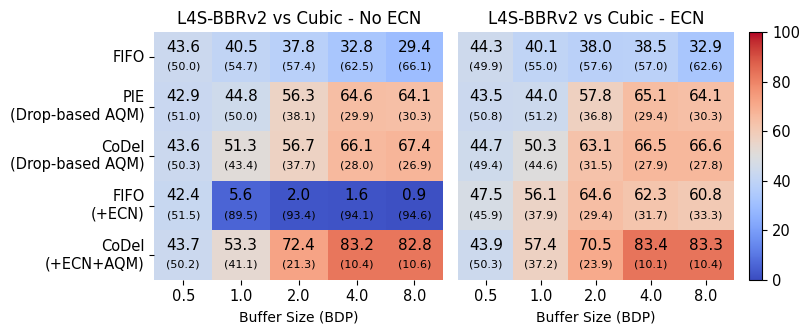

In [ ]:
plots = [{'title': 'L4S-BBRv2 vs Cubic - No ECN', 'CC': 'cubic', 'ECN': 0},
         {'title': 'L4S-BBRv2 vs Cubic - ECN', 'CC': 'cubic', 'ECN': 1}]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8.2,3.44), gridspec_kw={"width_ratios":[1.05, 1, 0.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_tpt[(df_tpt.LegacyCC == p['CC']) &
                    (df_tpt.ECN == p['ECN']) &
                    (df_tpt.Queue.isin(single_queues))]

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "ScalableBBRv2"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(single_queues)
    pivot_table_legacy = pivot_table_legacy.reindex(single_queues)

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s, ax=ax[i], cmap="coolwarm", center=50, vmin=0, vmax=100, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""

            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11)
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='black')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    if i > 0:
        ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
        ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[2])

#plt.suptitle("Scalable BBRv2 throughput (Mbps) when sharing 100Mbps bottleneck with Cubic flow");
#plt.suptitle("Scalable BBRv2 with AccECN throughput (Mbps) vs CUBIC flow",fontsize=15);
plt.tight_layout()

plt.savefig("ScalableBBRv2-tput-cubic-singlequeue-1vs1-v4.pdf")


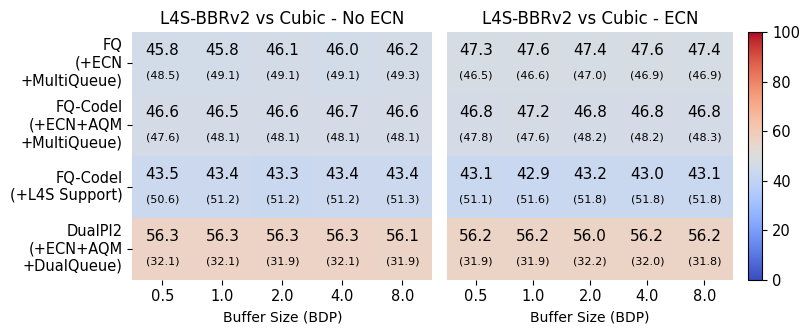

In [ ]:
plots = [{'title': 'L4S-BBRv2 vs Cubic - No ECN', 'CC': 'cubic', 'ECN': 0},
         {'title': 'L4S-BBRv2 vs Cubic - ECN', 'CC': 'cubic', 'ECN': 1}]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8.2,3.44), gridspec_kw={"width_ratios":[1.05, 1, 0.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_tpt[(df_tpt.LegacyCC == p['CC']) &
                    (df_tpt.ECN == p['ECN']) &
                    (df_tpt.Queue.isin(multiple_queues))]

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "ScalableBBRv2"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(multiple_queues)
    pivot_table_legacy = pivot_table_legacy.reindex(multiple_queues)

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s, ax=ax[i], cmap="coolwarm", center=50, vmin=0, vmax=100, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""

            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11)
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='black')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    if i > 0:
        ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
        ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[2])

#plt.suptitle("Scalable BBRv2 throughput (Mbps) when sharing 100Mbps bottleneck with Cubic flow");
#plt.suptitle("Scalable BBRv2 with AccECN throughput (Mbps) vs CUBIC flow",fontsize=15);
plt.tight_layout()

plt.savefig("ScalableBBRv2-tput-cubic-multiplequeue-1vs1-v4.pdf")


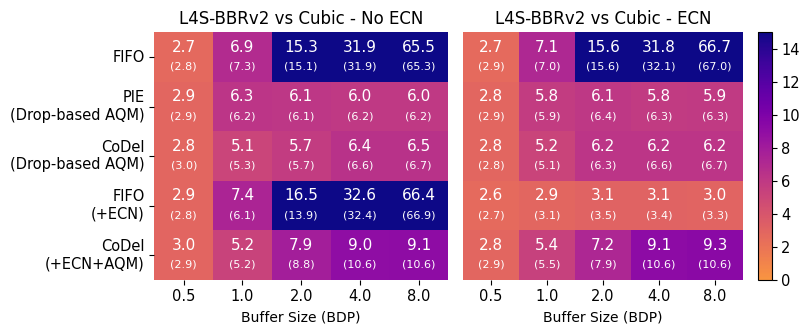

In [ ]:
plots = [{'title': 'L4S-BBRv2 vs Cubic - No ECN', 'CC': 'cubic', 'ECN': 0},
         {'title': 'L4S-BBRv2 vs Cubic - ECN', 'CC': 'cubic', 'ECN': 1}]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8.2,3.44), gridspec_kw={"width_ratios":[1.05, 1, 0.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_rtt[(df_rtt.LegacyCC == p['CC']) &
                    (df_rtt.ECN == p['ECN']) &
                    (df_rtt.Queue.isin(single_queues))]

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "ScalableBBRv2"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(single_queues)
    pivot_table_legacy = pivot_table_legacy.reindex(single_queues)

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s-10, ax=ax[i], cmap="plasma_r", center=5, vmin=0, vmax=15, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            l4s_value = l4s_value -10
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""
            legacy_value = legacy_value-10
            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11, color="white")
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='white')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    if i > 0:
        ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
        ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[2])

#plt.suptitle("Prague queuing delay (ms) when sharing bottleneck with legacy flow\n(ECN threshold is 5ms, where applicable. For DualPI2, L4S queue has 1ms threshold.)");
#plt.suptitle("Scalable BBRv2 with AccECN queuing delay (ms) vs CUBIC flow",fontsize=15);
plt.tight_layout()

plt.savefig("ScalableBBRv2-latency-cubic-singlequeue-1vs1-v4.pdf")

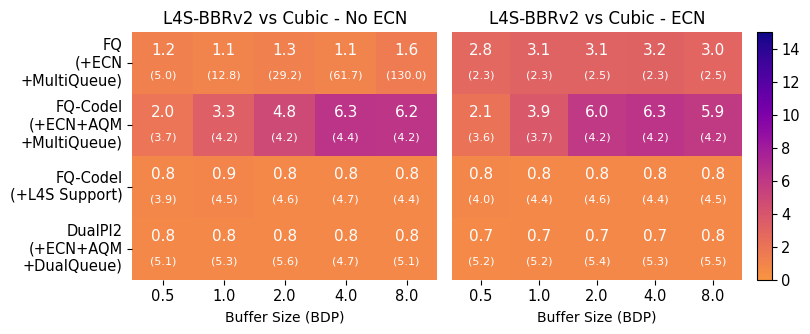

In [ ]:
plots = [{'title': 'L4S-BBRv2 vs Cubic - No ECN', 'CC': 'cubic', 'ECN': 0},
         {'title': 'L4S-BBRv2 vs Cubic - ECN', 'CC': 'cubic', 'ECN': 1}]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8.2,3.44), gridspec_kw={"width_ratios":[1.05, 1, 0.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_rtt[(df_rtt.LegacyCC == p['CC']) &
                    (df_rtt.ECN == p['ECN']) &
                    (df_rtt.Queue.isin(multiple_queues))]

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "ScalableBBRv2"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(multiple_queues)
    pivot_table_legacy = pivot_table_legacy.reindex(multiple_queues)

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s-10, ax=ax[i], cmap="plasma_r", center=5, vmin=0, vmax=15, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            l4s_value = l4s_value -10
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""
            legacy_value = legacy_value-10
            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11, color="white")
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='white')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    if i > 0:
        ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
        ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[2])

#plt.suptitle("Prague queuing delay (ms) when sharing bottleneck with legacy flow\n(ECN threshold is 5ms, where applicable. For DualPI2, L4S queue has 1ms threshold.)");
#plt.suptitle("Scalable BBRv2 with AccECN queuing delay (ms) vs CUBIC flow",fontsize=15);
plt.tight_layout()

plt.savefig("ScalableBBRv2-latency-cubic-multiplequeue-1vs1-v4.pdf")

## Scalable BBRv2 vs non-scalable BBRv2 Results

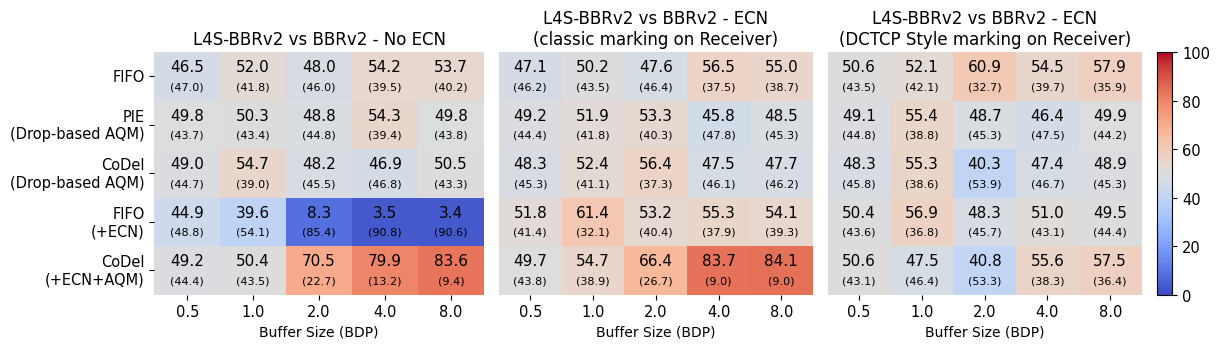

In [ ]:
plots = [{'title': 'L4S-BBRv2 vs BBRv2 - No ECN', 'CC': 'bbrv2', 'ECN': 0},
         {'title': 'L4S-BBRv2 vs BBRv2 - ECN\n(classic marking on Receiver)', 'CC': 'bbrv2', 'ECN': 1},
         {'title': 'L4S-BBRv2 vs BBRv2 - ECN\n(DCTCP Style marking on Receiver)', 'CC': 'bbrv2-dctcp', 'ECN': 1}]

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12.3,3.6), gridspec_kw={"width_ratios":[1.05, 1, 1, 0.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_tpt[(df_tpt.LegacyCC == p['CC']) &
                    (df_tpt.ECN == p['ECN']) &
                    (df_tpt.Queue.isin(single_queues))]

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "ScalableBBRv2"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(single_queues)
    pivot_table_legacy = pivot_table_legacy.reindex(single_queues)

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s, ax=ax[i], cmap="coolwarm", center=50, vmin=0, vmax=100, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""

            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11)
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='black')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    if i > 0:
        ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
        ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[3])

#plt.suptitle("Scalable BBRv2 throughput (Mbps) when sharing 100Mbps bottleneck with Cubic flow");
#plt.suptitle("Scalable BBRv2 with AccECN throughput (Mbps) vs BBRv2 flow",fontsize=15);
plt.tight_layout()

plt.savefig("ScalableBBRv2-tput-bbrv2-singlequeue-1vs1-v4.pdf")

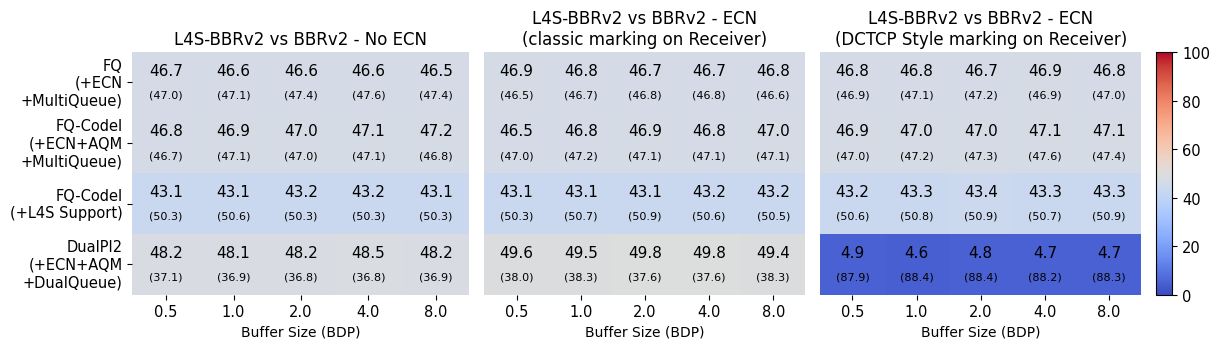

In [ ]:
plots = [{'title': 'L4S-BBRv2 vs BBRv2 - No ECN', 'CC': 'bbrv2', 'ECN': 0},
         {'title': 'L4S-BBRv2 vs BBRv2 - ECN\n(classic marking on Receiver)', 'CC': 'bbrv2', 'ECN': 1},
         {'title': 'L4S-BBRv2 vs BBRv2 - ECN\n(DCTCP Style marking on Receiver)', 'CC': 'bbrv2-dctcp', 'ECN': 1}]

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12.3,3.6), gridspec_kw={"width_ratios":[1.05, 1, 1, 0.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_tpt[(df_tpt.LegacyCC == p['CC']) &
                    (df_tpt.ECN == p['ECN']) &
                    (df_tpt.Queue.isin(multiple_queues))]

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "ScalableBBRv2"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(multiple_queues)
    pivot_table_legacy = pivot_table_legacy.reindex(multiple_queues)

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s, ax=ax[i], cmap="coolwarm", center=50, vmin=0, vmax=100, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""

            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11)
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='black')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    if i > 0:
        ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
        ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[3])

#plt.suptitle("Scalable BBRv2 throughput (Mbps) when sharing 100Mbps bottleneck with Cubic flow");
#plt.suptitle("Scalable BBRv2 with AccECN throughput (Mbps) vs BBRv2 flow",fontsize=15);
plt.tight_layout()

plt.savefig("ScalableBBRv2-tput-bbrv2-multiplequeue-1vs1-v4.pdf")

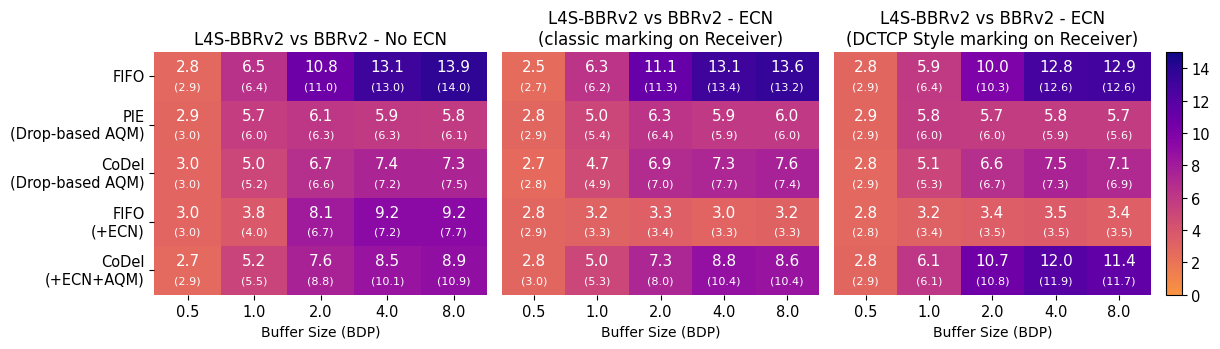

In [ ]:
plots = [{'title': 'L4S-BBRv2 vs BBRv2 - No ECN', 'CC': 'bbrv2', 'ECN': 0},
         {'title': 'L4S-BBRv2 vs BBRv2 - ECN\n(classic marking on Receiver)', 'CC': 'bbrv2', 'ECN': 1},
         {'title': 'L4S-BBRv2 vs BBRv2 - ECN\n(DCTCP Style marking on Receiver)', 'CC': 'bbrv2-dctcp', 'ECN': 1}]

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12.3,3.6), gridspec_kw={"width_ratios":[1.05, 1, 1, 0.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_rtt[(df_rtt.LegacyCC == p['CC']) &
                    (df_rtt.ECN == p['ECN']) &
                    (df_rtt.Queue.isin(single_queues))]

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "ScalableBBRv2"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(single_queues)
    pivot_table_legacy = pivot_table_legacy.reindex(single_queues)

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s-10, ax=ax[i], cmap="plasma_r", center=5, vmin=0, vmax=15, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            l4s_value = l4s_value -10
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""
            legacy_value = legacy_value-10
            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11, color="white")
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='white')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    if i > 0:
        ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
        ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[3])

#plt.suptitle("Scalable BBRv2 with AccECN queuing delay (ms) vs BBRv2 flow",fontsize=15);
plt.tight_layout()

plt.savefig("ScalableBBRv2-latency-bbrv2-singlequeue-1vs1-v4.pdf")

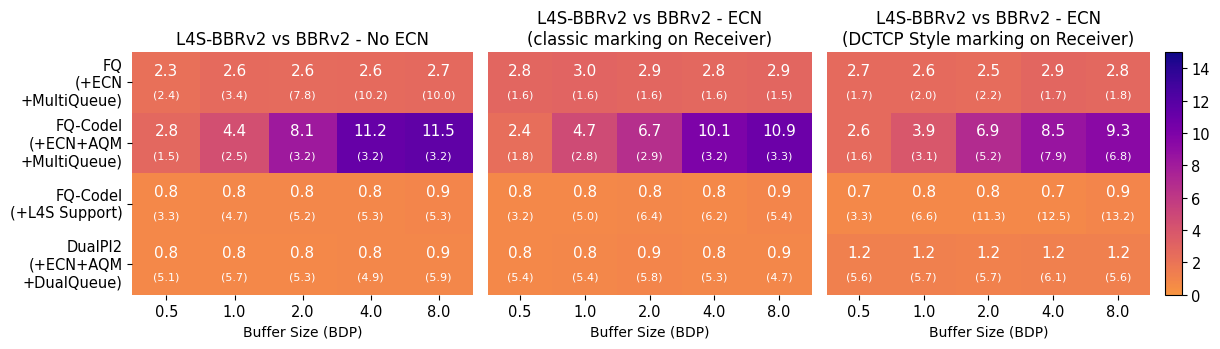

In [ ]:
plots = [{'title': 'L4S-BBRv2 vs BBRv2 - No ECN', 'CC': 'bbrv2', 'ECN': 0},
         {'title': 'L4S-BBRv2 vs BBRv2 - ECN\n(classic marking on Receiver)', 'CC': 'bbrv2', 'ECN': 1},
         {'title': 'L4S-BBRv2 vs BBRv2 - ECN\n(DCTCP Style marking on Receiver)', 'CC': 'bbrv2-dctcp', 'ECN': 1}]

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12.3,3.6), gridspec_kw={"width_ratios":[1.05, 1, 1, 0.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_rtt[(df_rtt.LegacyCC == p['CC']) &
                    (df_rtt.ECN == p['ECN']) &
                    (df_rtt.Queue.isin(multiple_queues))]

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "ScalableBBRv2"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(multiple_queues)
    pivot_table_legacy = pivot_table_legacy.reindex(multiple_queues)

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s-10, ax=ax[i], cmap="plasma_r", center=5, vmin=0, vmax=15, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            l4s_value = l4s_value -10
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""
            legacy_value = legacy_value-10
            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11, color="white")
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='white')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    if i > 0:
        ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
        ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[3])

#plt.suptitle("Scalable BBRv2 with AccECN queuing delay (ms) vs BBRv2 flow",fontsize=15);
plt.tight_layout()

plt.savefig("ScalableBBRv2-latency-bbrv2-multiplequeue-1vs1-v4.pdf")

## Scalable BBRv2 vs BBRv1 Results

<ipython-input-57-146026d8d5c3>:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


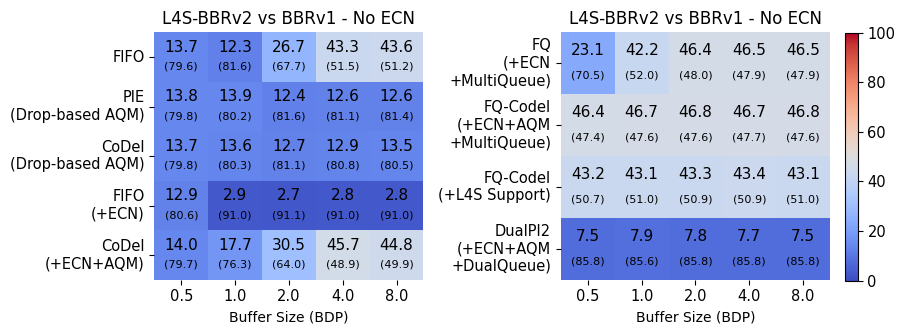

In [ ]:
plots = [{'title': 'L4S-BBRv2 vs BBRv1 - No ECN', 'CC': 'bbrv1', 'ECN': 0, 'queues': single_queues},
         {'title': 'L4S-BBRv2 vs BBRv1 - No ECN', 'CC': 'bbrv1', 'ECN': 0, 'queues': multiple_queues}]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8.5, 3.44), gridspec_kw={"width_ratios":[1.05, 1.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_tpt[(df_tpt.LegacyCC == p['CC']) &
                    (df_tpt.ECN == p['ECN']) &
                    (df_tpt.Queue.isin(p['queues']))]  # Use the correct queue set

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "ScalableBBRv2"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(p['queues'])
    pivot_table_legacy = pivot_table_legacy.reindex(p['queues'])

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s, ax=ax[i], cmap="coolwarm", center=50, vmin=0, vmax=100, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""

            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11)
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='black')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    #if i > 0:
    #    ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
    #    ax[i].set_yticks([])

# colorbar
cbar_ax = fig.add_axes([1, 0.17, 0.015, 0.72])  # [left, bottom, width, height] of the colorbar
fig.colorbar(ax[0].get_children()[0], cax=cbar_ax)

#fig.colorbar(ax[0].get_children()[0], cax=ax[2])

#plt.suptitle("Scalable BBRv2 with AccECN throughput (Mbps) vs BBRv1 flow", fontsize=15, x=0.6)
plt.tight_layout()

plt.savefig("ScalableBBRv2-tput-bbrv1-singlequeue-vs-multiqueue-1vs1-v2.pdf", bbox_inches='tight')


<ipython-input-58-a582d77f2ea9>:53: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


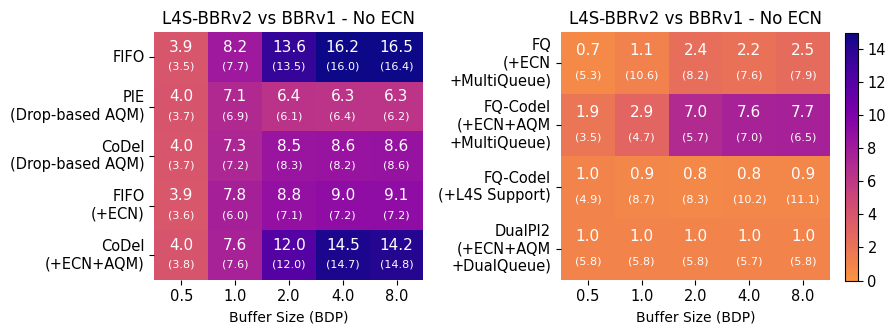

In [ ]:
plots = [{'title': 'L4S-BBRv2 vs BBRv1 - No ECN', 'CC': 'bbrv1', 'ECN': 0, 'queues': single_queues},
         {'title': 'L4S-BBRv2 vs BBRv1 - No ECN', 'CC': 'bbrv1', 'ECN': 0, 'queues': multiple_queues}]


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8.5, 3.44), gridspec_kw={"width_ratios":[1.05, 1.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_rtt[(df_rtt.LegacyCC == p['CC']) &
                    (df_rtt.ECN == p['ECN']) &
                    (df_rtt.Queue.isin(p['queues']))]  # Use the correct queue set

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "ScalableBBRv2"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(p['queues'])
    pivot_table_legacy = pivot_table_legacy.reindex(p['queues'])

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s-10, ax=ax[i], cmap="plasma_r", center=5, vmin=0, vmax=15, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            l4s_value = l4s_value -10
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""
            legacy_value = legacy_value - 10

            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11, color='white')
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='white')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    #if i > 0:
    #    ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
    #    ax[i].set_yticks([])

# colorbar
cbar_ax = fig.add_axes([1, 0.17, 0.015, 0.72])  # [left, bottom, width, height] of the colorbar
fig.colorbar(ax[0].get_children()[0], cax=cbar_ax)

#fig.colorbar(ax[0].get_children()[0], cax=ax[2])

#plt.suptitle("Scalable BBRv2 with AccECN queuing delay (ms) vs BBRv1 flow", fontsize=15, x=0.6)
plt.tight_layout()

plt.savefig("ScalableBBRv2-latency-bbrv1-singlequeue-vs-multiqueue-1vs1-v2.pdf", bbox_inches='tight')

## Scalable BBRv2 vs BBRv3

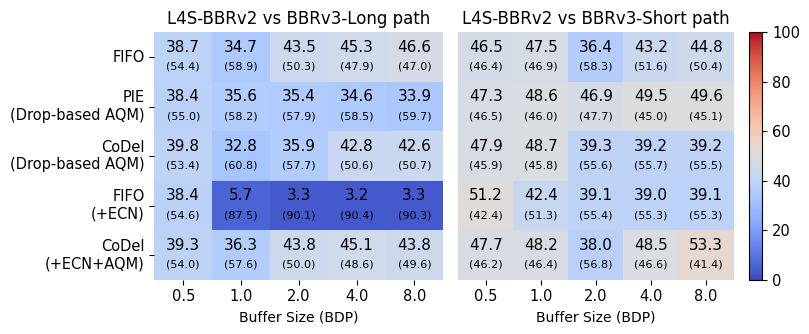

In [ ]:
plots = [{'title': 'L4S-BBRv2 vs BBRv3-Long path', 'CC': 'bbrv3', 'ECN': 1, 'BaseRTT': 10},
         {'title': 'L4S-BBRv2 vs BBRv3-Short path', 'CC': 'ecnlow-bbrv3', 'ECN': 1, 'BaseRTT': 2}]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8.2,3.44), gridspec_kw={"width_ratios":[1.05, 1, 0.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_tpt[(df_tpt.LegacyCC == p['CC']) &
                    (df_tpt.ECN == p['ECN']) &
                    (df_tpt.BaseRTT == p['BaseRTT']) &
                    (df_tpt.Queue.isin(single_queues))]

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "ScalableBBRv2"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(single_queues)
    pivot_table_legacy = pivot_table_legacy.reindex(single_queues)

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s, ax=ax[i], cmap="coolwarm", center=50, vmin=0, vmax=100, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""

            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11)
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='black')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    if i > 0:
        ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
        ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[2])

# Supertitle
#plt.suptitle("Scalable BBRv2 throughput (Mbps) vs BBRv3 flow - classic marking on Receiver",fontsize=15);

plt.tight_layout()

plt.savefig("scalablebbrv2-tput-bbrv3-singlequeue-1vs1-v4.pdf")


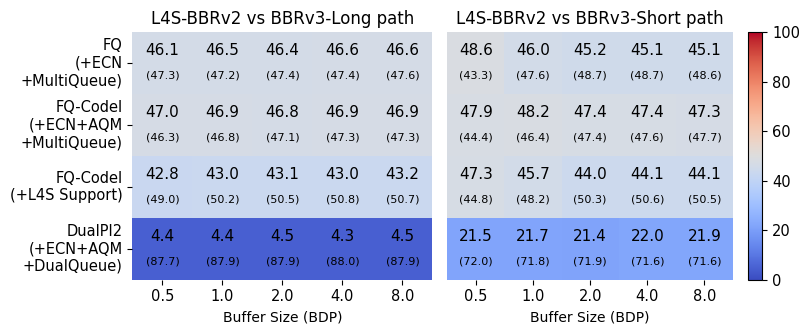

In [ ]:
plots = [{'title': 'L4S-BBRv2 vs BBRv3-Long path', 'CC': 'bbrv3', 'ECN': 1, 'BaseRTT': 10},
         {'title': 'L4S-BBRv2 vs BBRv3-Short path', 'CC': 'ecnlow-bbrv3', 'ECN': 1, 'BaseRTT': 2}]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8.2,3.44), gridspec_kw={"width_ratios":[1.05, 1, 0.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_tpt[(df_tpt.LegacyCC == p['CC']) &
                    (df_tpt.ECN == p['ECN']) &
                    (df_tpt.BaseRTT == p['BaseRTT']) &
                    (df_tpt.Queue.isin(multiple_queues))]

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "ScalableBBRv2"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(multiple_queues)
    pivot_table_legacy = pivot_table_legacy.reindex(multiple_queues)

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s, ax=ax[i], cmap="coolwarm", center=50, vmin=0, vmax=100, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""

            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11)
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='black')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    if i > 0:
        ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
        ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[2])

# Supertitle
#plt.suptitle("Scalable BBRv2 throughput (Mbps) vs BBRv3 flow - classic marking on Receiver",fontsize=15);

plt.tight_layout()

plt.savefig("scalablebbrv2-tput-bbrv3-multiplequeue-1vs1-v4.pdf")


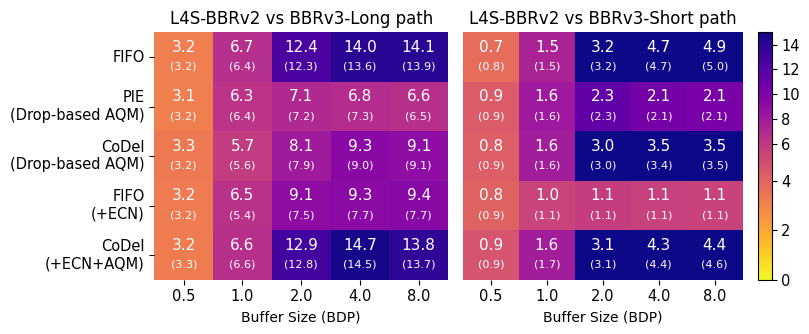

In [ ]:
from matplotlib import colors

plots = [{'title': 'L4S-BBRv2 vs BBRv3-Long path', 'CC': 'bbrv3', 'ECN': 1, 'BaseRTT': 10, 'ECNThresh':5},
         {'title': 'L4S-BBRv2 vs BBRv3-Short path', 'CC': 'ecnlow-bbrv3', 'ECN': 1, 'BaseRTT': 2, 'ECNThresh':1}]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8.2,3.44), gridspec_kw={"width_ratios":[1.05, 1, 0.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_rtt[(df_rtt.LegacyCC == p['CC']) &
                    (df_rtt.ECN == p['ECN']) &
                    (df_tpt.BaseRTT == p['BaseRTT']) &
                    (df_rtt.Queue.isin(single_queues))]

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "ScalableBBRv2"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(single_queues)
    pivot_table_legacy = pivot_table_legacy.reindex(single_queues)



    divnorm = colors.TwoSlopeNorm(vmin=0, vcenter=p['ECNThresh'], vmax=p['ECNThresh'] + p['BaseRTT'])

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s-p['BaseRTT'], ax=ax[i], cmap="plasma_r", norm=divnorm, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            l4s_value = l4s_value -p['BaseRTT']
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""
            legacy_value = legacy_value-p['BaseRTT']
            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11, color="white")
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='white')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    if i > 0:
        ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
        ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[2])

# Supertitle
#plt.suptitle("ScalableBBRv2 queuing delay (ms) vs BBRv3 flow - classic marking on Receiver", fontsize=15);

plt.tight_layout()

plt.savefig("scalableBBRv2-latency-bbrv3-singlequeue-1vs1-v4.pdf")

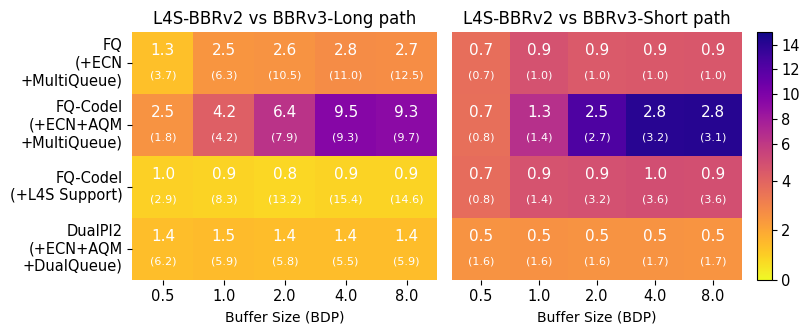

In [ ]:
from matplotlib import colors

plots = [{'title': 'L4S-BBRv2 vs BBRv3-Long path', 'CC': 'bbrv3', 'ECN': 1, 'BaseRTT': 10, 'ECNThresh':5},
         {'title': 'L4S-BBRv2 vs BBRv3-Short path', 'CC': 'ecnlow-bbrv3', 'ECN': 1, 'BaseRTT': 2, 'ECNThresh':1}]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8.2,3.44), gridspec_kw={"width_ratios":[1.05, 1, 0.05]})

for i, p in enumerate(plots):
    # Filter the data for the current plot configuration (both L4S and Legacy)
    dat_hm = df_rtt[(df_rtt.LegacyCC == p['CC']) &
                    (df_rtt.ECN == p['ECN']) &
                    (df_tpt.BaseRTT == p['BaseRTT']) &
                    (df_rtt.Queue.isin(multiple_queues))]

    # Pivot the data to have both L4S and Legacy values for each BufferSize
    pivot_table_l4s = dat_hm[dat_hm.FlowType == "ScalableBBRv2"].pivot(index="Queue", columns="BufferSize", values="Value")
    pivot_table_legacy = dat_hm[dat_hm.FlowType == "Legacy"].pivot(index="Queue", columns="BufferSize", values="Value")

    pivot_table_l4s = pivot_table_l4s.reindex(multiple_queues)
    pivot_table_legacy = pivot_table_legacy.reindex(multiple_queues)



    divnorm = colors.TwoSlopeNorm(vmin=0, vcenter=p['ECNThresh'], vmax=p['ECNThresh'] + p['BaseRTT'])

    # Create the heatmap without annotations
    sns.heatmap(pivot_table_l4s-p['BaseRTT'], ax=ax[i], cmap="plasma_r", norm=divnorm, cbar=False, annot=False)

    # Manually add both L4S and Legacy values as annotations (main number and smaller number)
    for y in range(pivot_table_l4s.shape[0]):
        for x in range(pivot_table_l4s.shape[1]):
            l4s_value = pivot_table_l4s.iloc[y, x] if not pd.isna(pivot_table_l4s.iloc[y, x]) else ""
            l4s_value = l4s_value -p['BaseRTT']
            legacy_value = pivot_table_legacy.iloc[y, x] if not pd.isna(pivot_table_legacy.iloc[y, x]) else ""
            legacy_value = legacy_value-p['BaseRTT']
            ax[i].text(x + 0.5, y + 0.3, f'{l4s_value:.1f}',
                       ha='center', va='center', fontsize=11, color="white")
            ax[i].text(x + 0.5, y + 0.7, f'({legacy_value:.1f})',
                       ha='center', va='center', fontsize=8, color='white')

    # Set titles and labels
    ax[i].set_title(p['title'])
    ax[i].set_xlabel("Buffer Size (BDP)")
    ax[i].set_ylabel("")
    ax[i].set_yticklabels(ax[i].get_yticklabels(), rotation=0)

    if i > 0:
        ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
        ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[2])

# Supertitle
#plt.suptitle("ScalableBBRv2 queuing delay (ms) vs BBRv3 flow - classic marking on Receiver", fontsize=15);

plt.tight_layout()

plt.savefig("scalableBBRv2-latency-bbrv3-multiplequeue-1vs1-v4.pdf")

# Check on utilization -

In [ ]:
# Include 'Trial' in your experiment factors
#exp_factors = ['LegacyCC', 'ECN', 'ECNThresh', 'Fallback', 'FlowType',
#               'BufferSize', 'BottleneckCap', 'BaseRTT', 'Queue', 'AccECN', 'Trial']

exp_factors = ['LegacyCC', 'ECN', 'ECNThresh', 'FlowType',
               'BufferSize', 'BottleneckCap', 'BaseRTT', 'Queue', 'AccECN', 'Trial']


# For RTT values without averaging over trials
df_rtt_new = df[df.ValueType == "RTT"][exp_factors + ['Value']]

# For Throughput values without averaging over trials
df_tpt_new = df[df.ValueType == "Throughput"][exp_factors + ['Value']]


In [ ]:
#exp_factors_no_flowtype = ['LegacyCC', 'ECN', 'ECNThresh', 'Fallback',
#                           'BufferSize', 'BottleneckCap', 'BaseRTT',
#                           'Queue', 'AccECN', 'Trial']

exp_factors_no_flowtype = ['LegacyCC', 'ECN', 'ECNThresh',
                           'BufferSize', 'BottleneckCap', 'BaseRTT',
                           'Queue', 'AccECN', 'Trial']

df_total_tpt = df_tpt_new.groupby(exp_factors_no_flowtype, observed=True)['Value'].sum().reset_index()

# Rename the 'Value' column to 'TotalThroughput' for clarity
df_total_tpt.rename(columns={'Value': 'TotalThroughput'}, inplace=True)

# Now, df_total_tpt contains the sum of L4S and Cubic throughputs per trial for each experiment
print(df_total_tpt)

          LegacyCC  ECN ECNThresh  BufferSize  BottleneckCap  BaseRTT  \
0            bbrv1    0         5         0.5          100.0     10.0   
1            bbrv1    0         5         0.5          100.0     10.0   
2            bbrv1    0         5         0.5          100.0     10.0   
3            bbrv1    0         5         0.5          100.0     10.0   
4            bbrv1    0         5         0.5          100.0     10.0   
...            ...  ...       ...         ...            ...      ...   
3595  ecnlow-bbrv3    1      none         8.0          100.0      2.0   
3596  ecnlow-bbrv3    1      none         8.0          100.0      2.0   
3597  ecnlow-bbrv3    1      none         8.0          100.0      2.0   
3598  ecnlow-bbrv3    1      none         8.0          100.0      2.0   
3599  ecnlow-bbrv3    1      none         8.0          100.0      2.0   

                      Queue  AccECN  Trial  TotalThroughput  
0     PIE\n(Drop-based AQM)       3      1        92.493267  

In [ ]:
# Find all rows where TotalThroughput is less than 90
low_throughput_rows = df_total_tpt[df_total_tpt['TotalThroughput'] < 90]

# Check if any such rows exist
if not low_throughput_rows.empty:
    print("Experiments with total throughput less than 90:")
    print(low_throughput_rows)
else:
    print("All experiments have a total throughput of 90 or more.")

Experiments with total throughput less than 90:
     LegacyCC  ECN ECNThresh  BufferSize  BottleneckCap  BaseRTT  \
520     bbrv2    0         5         0.5          100.0     10.0   
521     bbrv2    0         5         0.5          100.0     10.0   
522     bbrv2    0         5         0.5          100.0     10.0   
523     bbrv2    0         5         0.5          100.0     10.0   
524     bbrv2    0         5         0.5          100.0     10.0   
...       ...  ...       ...         ...            ...      ...   
3095    cubic    1         5         8.0          100.0     10.0   
3096    cubic    1         5         8.0          100.0     10.0   
3097    cubic    1         5         8.0          100.0     10.0   
3098    cubic    1         5         8.0          100.0     10.0   
3099    cubic    1         5         8.0          100.0     10.0   

                                Queue  AccECN  Trial  TotalThroughput  
520   DualPI2\n(+ECN+AQM\n+DualQueue)       3      1        85.

In [ ]:
min_total_throughput = df_total_tpt['TotalThroughput'].min()
print(min_total_throughput)

83.69586248469678


In [ ]:
max_total_throughput = df_total_tpt['TotalThroughput'].max()
print(max_total_throughput)

96.34749589042477


In [ ]:
high_throughput_rows = df_total_tpt[df_total_tpt['TotalThroughput'] > 97]
print(high_throughput_rows)

Empty DataFrame
Columns: [LegacyCC, ECN, ECNThresh, BufferSize, BottleneckCap, BaseRTT, Queue, AccECN, Trial, TotalThroughput]
Index: []


# Check on standard deviation -

In [ ]:
# now make data frames with mean value for each metric
exp_factors = ['LegacyCC', 'ECN', 'ECNThresh', 'FlowType', 'BufferSize', 'BottleneckCap', 'BaseRTT', 'Queue', 'AccECN']
df_rtt = df[df.ValueType=="RTT"].pivot_table(index=exp_factors, values=['Value'], aggfunc='std').reset_index()
df_tpt = df[df.ValueType=="Throughput"].pivot_table(index=exp_factors, values=['Value'], aggfunc='std').reset_index()

<ipython-input-69-bfecbe9edcf8>:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_rtt = df[df.ValueType=="RTT"].pivot_table(index=exp_factors, values=['Value'], aggfunc='std').reset_index()
<ipython-input-69-bfecbe9edcf8>:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df_tpt = df[df.ValueType=="Throughput"].pivot_table(index=exp_factors, values=['Value'], aggfunc='std').reset_index()


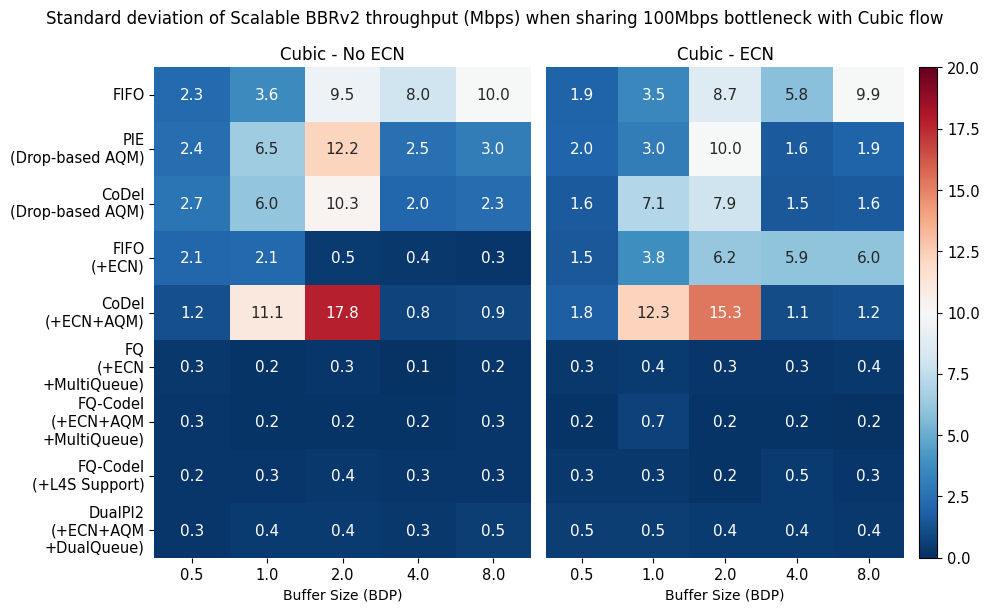

In [ ]:
plots = [{'title': 'Cubic - No ECN', 'CC': 'cubic', 'ECN': 0},
         {'title': 'Cubic - ECN', 'CC': 'cubic', 'ECN': 1}]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,6.2),  gridspec_kw={"width_ratios":[1.05, 1, 0.05]})

for i, p in enumerate(plots):
  dat_hm = df_tpt[(df_tpt.LegacyCC==p['CC']) & (df_tpt.FlowType=="ScalableBBRv2") & (df_tpt.ECN==p['ECN'])].pivot(index=["Queue"], columns=["BufferSize"], values="Value")
  sns.heatmap(dat_hm, ax=ax[i], annot=True, fmt=".1f", cmap="RdBu_r", center=10, vmin=0, vmax=20, cbar=False, annot_kws={"fontsize":11})
  ax[i].set_title(p['title'])
  ax[i].set_xlabel("Buffer Size (BDP)")
  ax[i].set_ylabel("")

  if i > 0:
    ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
    ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[2])

plt.suptitle("Standard deviation of Scalable BBRv2 throughput (Mbps) when sharing 100Mbps bottleneck with Cubic flow");
plt.tight_layout()

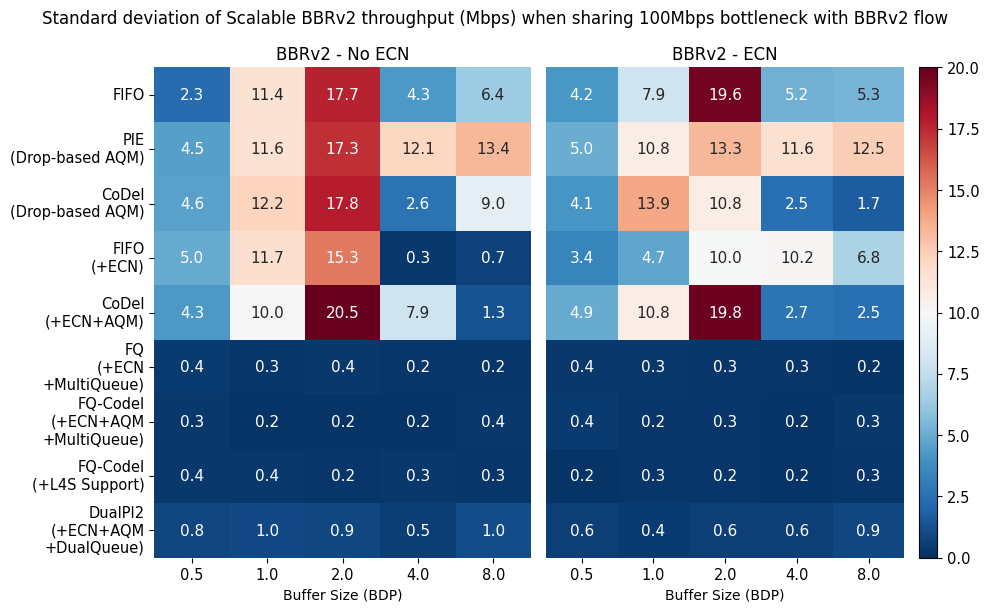

In [ ]:
plots = [{'title': 'BBRv2 - No ECN', 'CC': 'bbrv2', 'ECN': 0},
         {'title': 'BBRv2 - ECN', 'CC': 'bbrv2', 'ECN': 1}]

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,6.2),  gridspec_kw={"width_ratios":[1.05, 1, 0.05]})

for i, p in enumerate(plots):
  dat_hm = df_tpt[(df_tpt.LegacyCC==p['CC']) & (df_tpt.FlowType=="ScalableBBRv2") & (df_tpt.ECN==p['ECN'])].pivot(index=["Queue"], columns=["BufferSize"], values="Value")
  sns.heatmap(dat_hm, ax=ax[i], annot=True, fmt=".1f", cmap="RdBu_r", center=10, vmin=0, vmax=20, cbar=False, annot_kws={"fontsize":11})
  ax[i].set_title(p['title'])
  ax[i].set_xlabel("Buffer Size (BDP)")
  ax[i].set_ylabel("")

  if i > 0:
    ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
    ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[2])

plt.suptitle("Standard deviation of Scalable BBRv2 throughput (Mbps) when sharing 100Mbps bottleneck with BBRv2 flow");
plt.tight_layout()

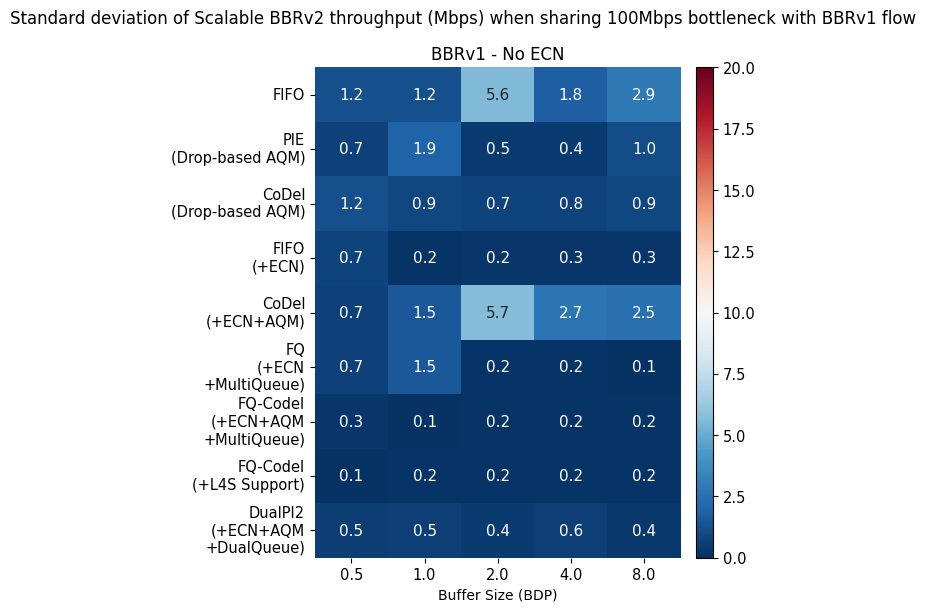

In [ ]:
plots = [{'title': 'BBRv1 - No ECN', 'CC': 'bbrv1', 'ECN': 0}]


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(6.15,6.2),  gridspec_kw={"width_ratios":[1.05, 0.05]})

for i, p in enumerate(plots):
  dat_hm = df_tpt[(df_tpt.LegacyCC==p['CC']) & (df_tpt.FlowType=="ScalableBBRv2") & (df_tpt.ECN==p['ECN'])].pivot(index=["Queue"], columns=["BufferSize"], values="Value")
  sns.heatmap(dat_hm, ax=ax[i], annot=True, fmt=".1f", cmap="RdBu_r", center=10, vmin=0, vmax=20, cbar=False, annot_kws={"fontsize":11})
  ax[i].set_title(p['title'])
  ax[i].set_xlabel("Buffer Size (BDP)")
  ax[i].set_ylabel("")

  if i > 0:
    ax[i].set_yticklabels([])  # Hide y-axis tick labels for other subplots
    ax[i].set_yticks([])

# colorbar
fig.colorbar(ax[0].get_children()[0], cax=ax[1])

plt.suptitle("Standard deviation of Scalable BBRv2 throughput (Mbps) when sharing 100Mbps bottleneck with BBRv1 flow");
plt.tight_layout()

In [ ]:
df[(df.LegacyCC=="cubic") & (df.ECN==0) & (df.BufferSize==2) & (df.Queue=='CoDel\n(+ECN+AQM)') & (df.ValueType=='Throughput')]

LegacyCC ECN ECNThresh       FlowType  BufferSize  BottleneckCap  BaseRTT  \
0    cubic   0         5  ScalableBBRv2         2.0          100.0     10.0   
0    cubic   0         5  ScalableBBRv2         2.0          100.0     10.0   
0    cubic   0         5  ScalableBBRv2         2.0          100.0     10.0   
0    cubic   0         5  ScalableBBRv2         2.0          100.0     10.0   
0    cubic   0         5  ScalableBBRv2         2.0          100.0     10.0   
0    cubic   0         5  ScalableBBRv2         2.0          100.0     10.0   
0    cubic   0         5  ScalableBBRv2         2.0          100.0     10.0   
0    cubic   0         5  ScalableBBRv2         2.0          100.0     10.0   
0    cubic   0         5  ScalableBBRv2         2.0          100.0     10.0   
0    cubic   0         5  ScalableBBRv2         2.0          100.0     10.0   
0    cubic   0         5         Legacy         2.0          100.0     10.0   
0    cubic   0         5         Legacy         2.0          100.0     10.0   
0    cubic   0         5         Legacy         2.0          100.0     10.0   
0    cubic   0         5         Legacy         2.0          100.0     10.0   
0    cubic   0         5         Legacy         2.0          100.0     10.0   
0    cubic   0         5         Legacy         2.0          100.0     10.0   
0    cubic   0         5         Legacy         2.0          100.0     10.0   
0    cubic   0         5         Legacy         2.0          100.0     10.0   
0    cubic   0         5         Legacy         2.0          100.0     10.0   
0    cubic   0         5         Legacy         2.0          100.0     10.0   

               Queue AccECN Trial      Value   ValueType  \
0  CoDel\n(+ECN+AQM)      3     2  83.853602  Throughput   
0  CoDel\n(+ECN+AQM)      3     4  49.639418  Throughput   
0  CoDel\n(+ECN+AQM)      3    10  83.522092  Throughput   
0  CoDel\n(+ECN+AQM)      3     7  83.889915  Throughput   
0  CoDel\n(+ECN+AQM)      3     8  82.519018  Throughput   
0  CoDel\n(+ECN+AQM)      3     9  46.002337  Throughput   
0  CoDel\n(+ECN+AQM)      3     6  83.824213  Throughput   
0  CoDel\n(+ECN+AQM)      3     3  44.534794  Throughput   
0  CoDel\n(+ECN+AQM)      3     1  83.931524  Throughput   
0  CoDel\n(+ECN+AQM)      3     5  82.338342  Throughput   
0  CoDel\n(+ECN+AQM)      3     9  48.899799  Throughput   
0  CoDel\n(+ECN+AQM)      3     5  11.002988  Throughput   
0  CoDel\n(+ECN+AQM)      3     7   9.285336  Throughput   
0  CoDel\n(+ECN+AQM)      3     1   9.197625  Throughput   
0  CoDel\n(+ECN+AQM)      3     6   9.396546  Throughput   
0  CoDel\n(+ECN+AQM)      3     2   9.654365  Throughput   
0  CoDel\n(+ECN+AQM)      3     3  50.383389  Throughput   
0  CoDel\n(+ECN+AQM)      3     4  44.430619  Throughput   
0  CoDel\n(+ECN+AQM)      3     8  10.601207  Throughput   
0  CoDel\n(+ECN+AQM)      3    10   9.733140  Throughput   

                                 str  
0    bbr2_2.0_100_10_Codel_5_0_3_0_2  
0    bbr2_2.0_100_10_Codel_5_0_3_0_4  
0   bbr2_2.0_100_10_Codel_5_0_3_0_10  
0    bbr2_2.0_100_10_Codel_5_0_3_0_7  
0    bbr2_2.0_100_10_Codel_5_0_3_0_8  
0    bbr2_2.0_100_10_Codel_5_0_3_0_9  
0    bbr2_2.0_100_10_Codel_5_0_3_0_6  
0    bbr2_2.0_100_10_Codel_5_0_3_0_3  
0    bbr2_2.0_100_10_Codel_5_0_3_0_1  
0    bbr2_2.0_100_10_Codel_5_0_3_0_5  
0   cubic_2.0_100_10_Codel_5_0_3_0_9  
0   cubic_2.0_100_10_Codel_5_0_3_0_5  
0   cubic_2.0_100_10_Codel_5_0_3_0_7  
0   cubic_2.0_100_10_Codel_5_0_3_0_1  
0   cubic_2.0_100_10_Codel_5_0_3_0_6  
0   cubic_2.0_100_10_Codel_5_0_3_0_2  
0   cubic_2.0_100_10_Codel_5_0_3_0_3  
0   cubic_2.0_100_10_Codel_5_0_3_0_4  
0   cubic_2.0_100_10_Codel_5_0_3_0_8  
0  cubic_2.0_100_10_Codel_5_0_3_0_10